# House Price Prediction

# 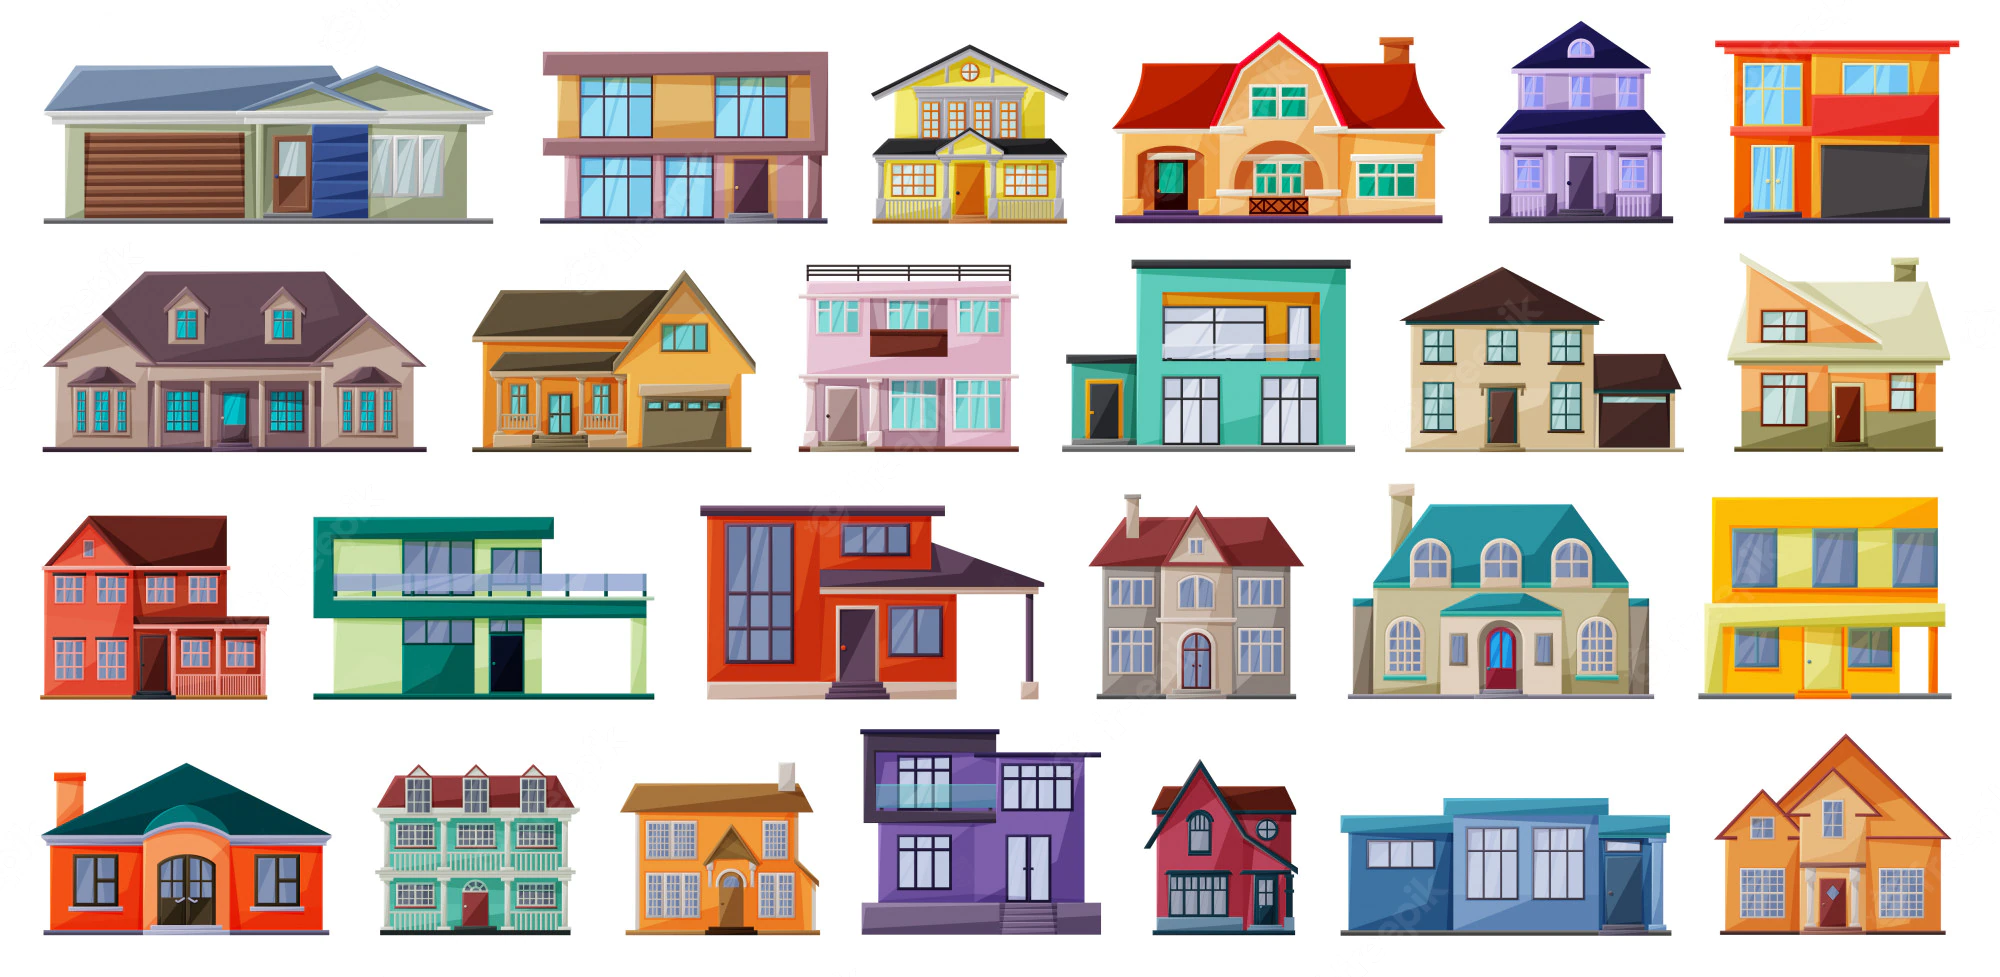

In [2]:
#importing required libraries
#numpy to do scientific calculation in python
import numpy as np
#pandas library is used to handle and manipulate the dataset
import pandas as pd
#matplot is used for visualization
import matplotlib.pyplot as plt
#seaborn used for visualization
import seaborn as sns
#warnings library removes the warnings
import warnings
warnings.filterwarnings('ignore')
#this library is used for mathematical calculation
import math

In [6]:
#Loading the dataset
#Making the Id column as index instead of droping it later 
df=pd.read_csv('train.csv')

In [7]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
test_df=pd.read_csv('test.csv')

In [8]:
#The dataset
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [13]:
test_df.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

# Basic Checks on the Dataset

In [4]:
#head of the dataset
#shows the first 5 rows of the dataset
pd.options.display.max_columns=None
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#tail of the dataset
#shows the last 5 rows of the dataset
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [6]:
#to show number of rows and column in the dataset
df.shape

(1460, 81)

This Data set has 1460 rows and 81 columns

In [7]:
#to look at the statistical summary for all features
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [8]:
#checking duplicate values
df.duplicated().sum()

0

# Datatype Correction

In [9]:
#this shows the summary of te dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#the dataset
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

# Handling Missing values

In [11]:
#shows all the rows with restriction
pd.options.display.max_rows=None
#checking all the null values in the dataset
nv=df.isnull().sum()
nv

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
#shows only the null values features
print(nv[nv>0],"\n")
print('There are total',len(nv[nv>0]),'columns with Missing Values')

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 

There are total 19 columns with Missing Values


In [13]:
#shows all together the total missing values in the dataset.
df.isnull().sum().sum()

6965

In [14]:
#shows the missing values
#The missing values has been order in descending order
nv[nv>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)

In [16]:
#sorting the null values in the descending order for better handling
nvp[nvp>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#handling the missing values 
#as removing the null values is not a good practice
#and we might lose datas
df['PoolQC']=df['PoolQC'].fillna('No Pool')
df["MiscFeature"]=df["MiscFeature"].fillna('No MiscFeatures')
df['Alley']=df['Alley'].fillna('No Alley')
df['Fence']=df['Fence'].fillna('No Fence')
df['FireplaceQu']=df['FireplaceQu'].fillna('No Fireplace ')

In [17]:
#this code helps to stop the showing all the rows and columns 
#in order to reduced the computational charge
pd.reset_option('max_columns')
pd.reset_option('max_rows')

In [18]:
#percentage of the null data
#after handling the null values
nvp=df.isnull().sum()*100/len(df)
#sorting the values in descending order for better analysis
nvp[nvp>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [19]:
#checking the dataset after handling the null values
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

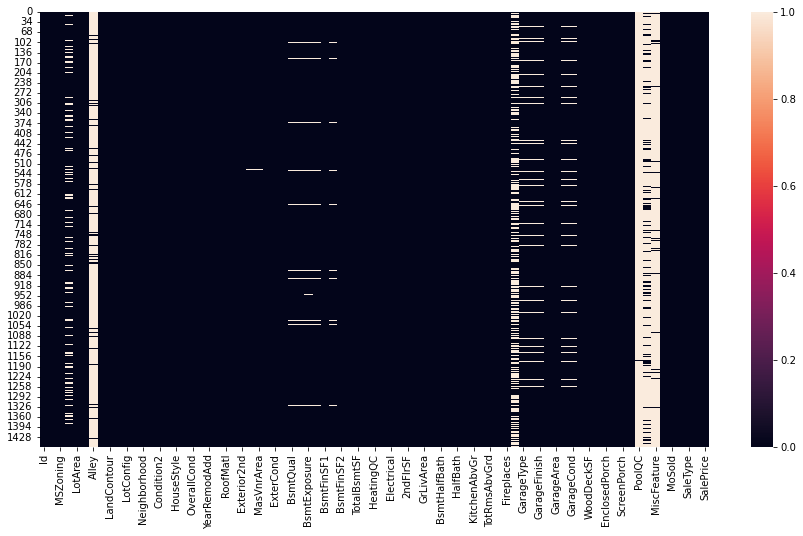

In [20]:
#chceking the null values
#using the heatmap from seaborn library
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=(15,8)
sns.heatmap(df.isnull())
plt.show()

In [21]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)[1:6]

MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

In [22]:
#handling the missing values 
df['GarageType']=df['GarageType'].fillna('No Garage')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageFinish']=df['GarageFinish'].fillna('No Garage')
df['GarageQual']=df['GarageQual'].fillna('No Garage')
df['GarageCond']=df['GarageCond'].fillna('No Garage')

In [23]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [24]:
pd.options.display.max_columns=None
#chceking the values after handling the missing values
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

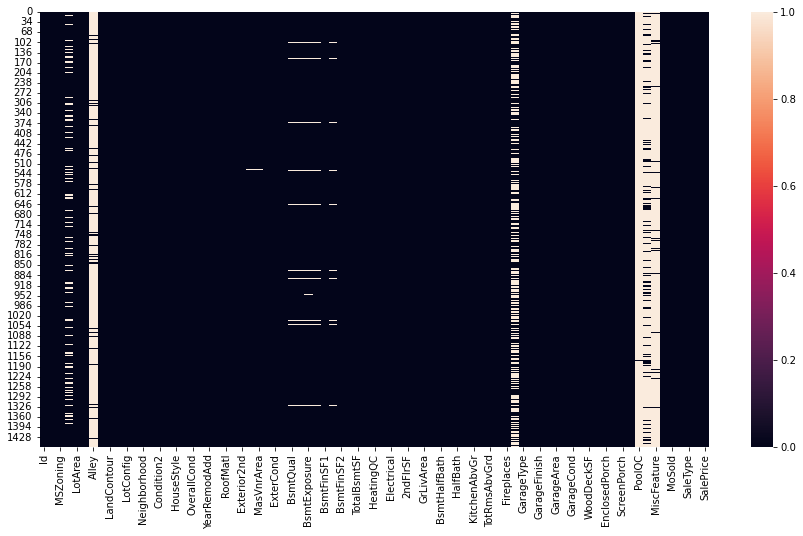

In [25]:
#checking the null values
#using the heatmap from seaborn library
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=(15,8)
sns.heatmap(df.isnull())
plt.show()

In [26]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [27]:
#handling missing values for basement category
df['BsmtExposure']=df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('No Basement')
df['BsmtQual']=df['BsmtQual'].fillna('No Basement')
df['BsmtCond']=df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('No Basement')

In [28]:
#checking the missing values in percentage
nvp=df.isnull().sum()*100/len(df)

In [29]:
#checking the remaining missing values in percentage
nvp[nvp>0].sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [30]:
#handling the missing values for masonry 
df['MasVnrType']=df['MasVnrType'].fillna('No Masonry')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [31]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [32]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
Electrical      0.068493
dtype: float64

In [33]:
#checking the unique values for LotFrontage
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [34]:
df[df['LotFrontage'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  1430          20       RL          NaN    12546   Pave   NaN      IR1   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7            Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
12           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
14           Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16           Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
24           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
...          ...       ...       ...       ...          ...        ...   
1429         Lvl    AllPub    Corner       Gtl       NWAmes       Norm   
1431         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1441         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1443         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1446         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
7          Norm     1Fam     2Story            7            6       1973   
12         Norm     1Fam     1Story            5            6       1962   
14         Norm     1Fam     1Story            6            5       1960   
16         Norm     1Fam     1Story            6            7       1970   
24         Norm     1Fam     1Story            5            8       1968   
...         ...      ...        ...          ...          ...        ...   
1429       Norm     1Fam     1Story            6            7       1981   
1431       Norm   TwnhsE     1Story            6            6       1976   
1441       Norm   TwnhsE     1Story            6            5       2004   
1443       Norm     1Fam     1.5Unf            6            6       1916   
1446       Norm     1Fam     1Story            5            7       1962   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
7             1973     Gable  CompShg     HdBoard     HdBoard      Stone   
12            1962       Hip  CompShg     HdBoard     Plywood       None   
14            1960       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16            1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
24            2001     Gable  CompShg     Plywood     Plywood       None   
...            ...       ...      ...         ...         ...        ...   
1429          1981     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1431          1976     Gable  CompShg     Plywood     Plywood       None   
1441          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1443          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1446          1962     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
7          240.0        TA        TA     CBlock       Gd       TA   
12           0.0        TA        TA     CBlock       TA       TA   
14         212.0        TA        TA     CBlock       TA       TA   
16         180.0        TA        TA     CBlock       TA       TA   

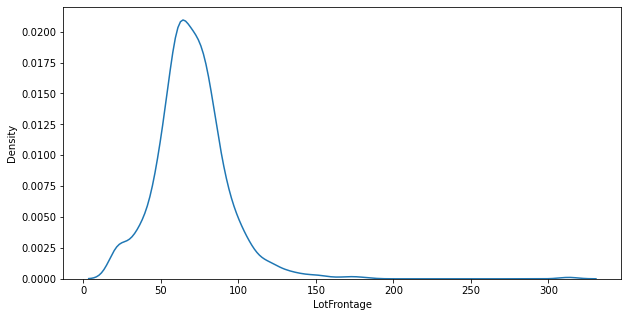

In [35]:
#plotting kdeplot to check the skewness
plt.figure(figsize=(10,5))
sns.kdeplot(df['LotFrontage'])
plt.show()

In [36]:
#handling the missing values in LotFrontage using median values of LotFrontage
df['LotFrontage']=df["LotFrontage"].fillna(df['LotFrontage'].median())

In [37]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
Electrical      0.068493
dtype: float64

In [38]:
#unique values in Electrical
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
df.isnull().sum()[df.isnull().sum()>0]

Alley          1369
Electrical        1
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [40]:
#The missing value in this Electrical
df[df['Electrical'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

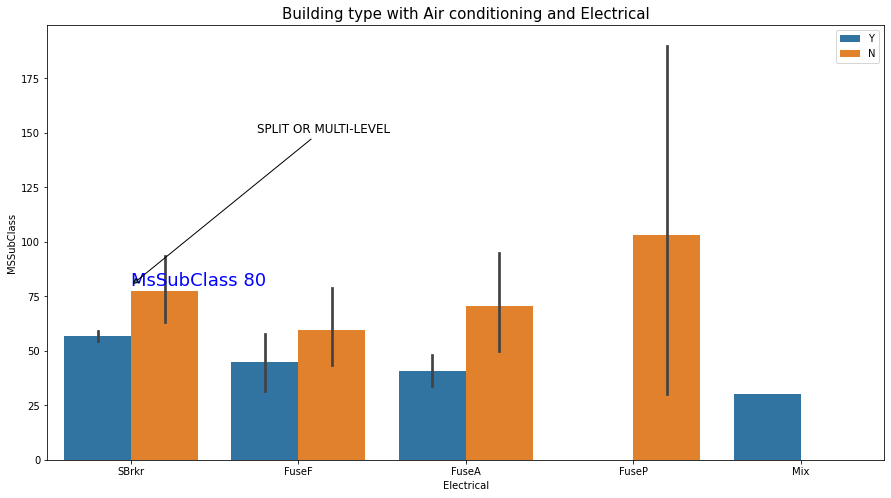

In [41]:
#The missing Values of Electrical
sns.barplot(x=df["Electrical"],hue=df['CentralAir'],y=df['MSSubClass'])
plt.legend(loc=1)
plt.title('Building type with Air conditioning and Electrical',fontsize=15)
plt.annotate('MsSubClass 80',xy=(0,80),fontsize=18,color='b')
plt.annotate('SPLIT OR MULTI-LEVEL',xy=(0,80),xytext=(0.75,150),arrowprops={'arrowstyle':'-|>'}, fontsize=12,)
plt.show()

In [42]:
#Comparing between the Electrical and MsSubClass
pd.crosstab(df['Electrical'],df['MSSubClass'],margins=True)

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  57  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1459

In [43]:
#Unique features of Electrical Feature
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
#most frequent value in Electrical
df["Electrical"].mode()

0    SBrkr
Name: Electrical, dtype: object

In [45]:
#Handling the Electrical missing value with mode value
df['Electrical']=df['Electrical'].fillna("SBrkr")

In [46]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
dtype: float64

In [47]:
#checking the total missing value for the dataset 
df.isnull().sum().sum()

6097

In [48]:
df.shape

(1460, 81)

In [49]:
test_df=pd.read_csv('test.csv')

In [50]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [51]:
final_df=pd.concat([df,test_df],axis=0)

In [52]:
final_df.shape

(2919, 81)

In [53]:

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [105]:
final_df.shape

(2919, 81)

In [107]:

df.dropna(inplace=True)

In [108]:

test_df.dropna(inplace=True)

### **1.All the Missing values has been handled**
### **2.No data is removed**
### **3.There is no loss in data**

# Feature Analysis

# Feature Selection

In [109]:
#Getting the most important features
corr_mat = df.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(22)

SalePrice       1.000000
OverallQual     0.800084
GrLivArea       0.730124
GarageCars      0.646108
1stFlrSF        0.607982
YearBuilt       0.584799
FullBath        0.582154
YearRemodAdd    0.566007
TotRmsAbvGrd    0.539478
Fireplaces      0.507617
OpenPorchSF     0.460889
GarageArea      0.426857
Foundation      0.411957
MasVnrArea      0.407049
LotArea         0.398471
CentralAir      0.354076
LotFrontage     0.343256
WoodDeckSF      0.339436
TotalBsmtSF     0.331807
GarageYrBlt     0.327496
GarageCond      0.325347
HalfBath        0.320636
Name: SalePrice, dtype: float64

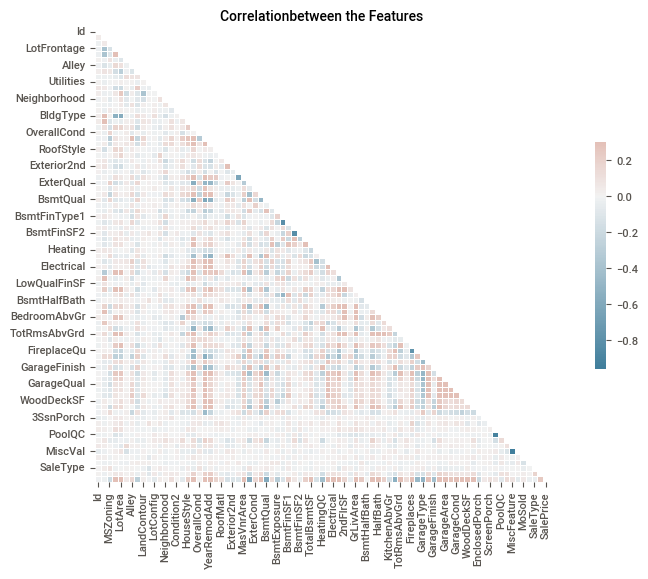

In [110]:
#Checking the correrealtion between the features
corr = df.corr() # We already examined SalePrice correlations
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlationbetween the Features',fontsize=10)

plt.show()

In [111]:
#looking at the important features using Recursive Feature Elimination and Linear Regression
#only the NUMERICAL FEATURES
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(df.fillna(0).select_dtypes(exclude='object'),df['SalePrice'])
selectedFeatures = list(
    df.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['Street',
 'OverallCond',
 'YearRemodAdd',
 'Foundation',
 '1stFlrSF',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'YrSold',
 'SalePrice']

# Univariate Analysis

### Sales Price (Target Variable) 

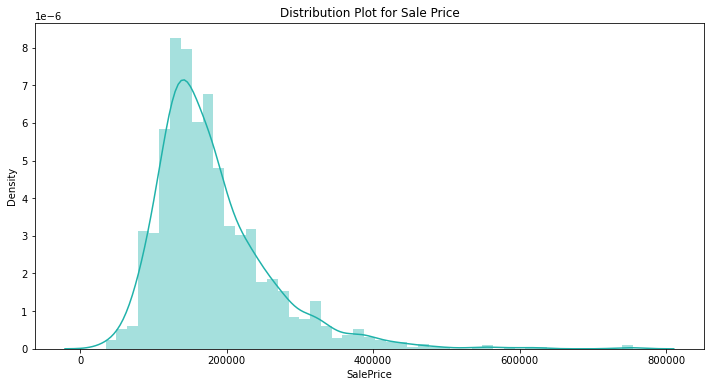

In [58]:
#plotting Distribution plot for SalePrice feature
plt.figure(figsize=(12,6))
plt.title('Distribution Plot for Sale Price')
sns.distplot(df["SalePrice"],color='lightseagreen')
plt.show()

###  Overall Quality of the House

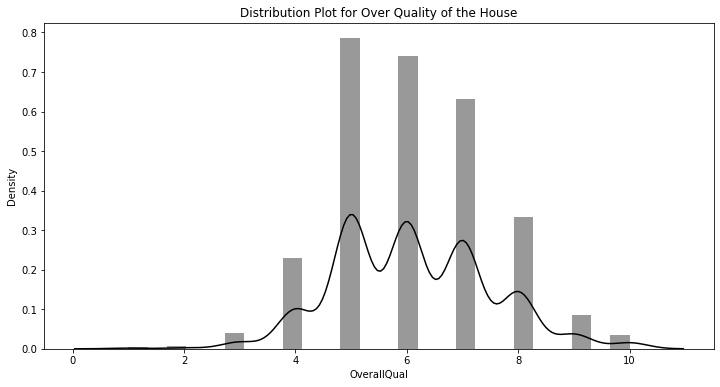

In [59]:
#plotting Distribution plot for Overall Quality of the House feature
plt.figure(figsize=(12,6))
plt.title('Distribution Plot for Over Quality of the House')
sns.distplot(df["OverallQual"],color='black')
plt.show()

In [60]:
df["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### Overall Condition Of the House

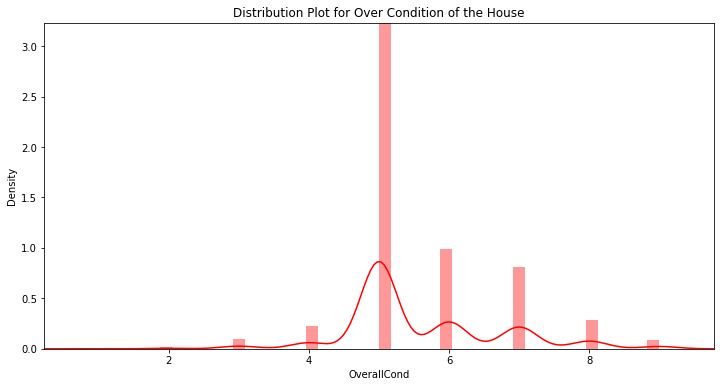

In [61]:
#plotting Distribution plot for Overall Condition of the House feature
plt.figure(figsize=(12,6))
plt.margins(x=0,y=0)
plt.title('Distribution Plot for Over Condition of the House')
sns.distplot(df["OverallCond"],color='red')
plt.show()

### GrLivArea

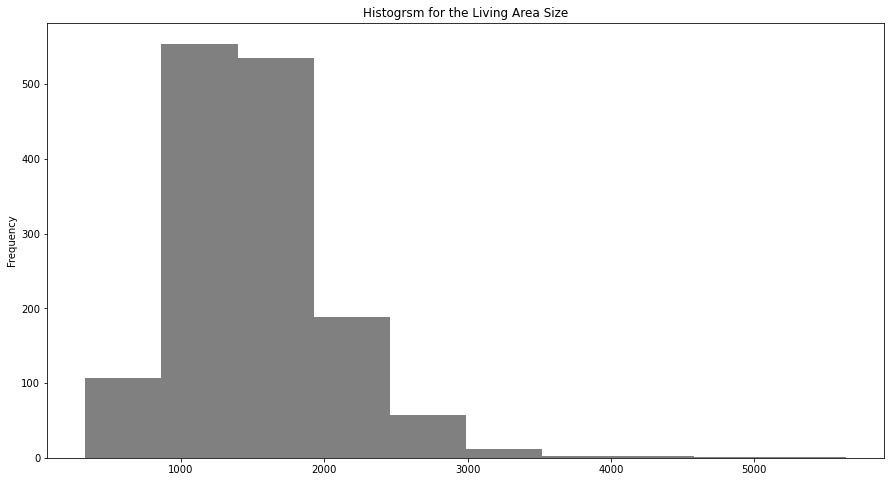

In [62]:
#plotting a Histogram using the Matplotlib library
#Living Area in Square feet
df['GrLivArea'].plot(kind='hist',color='grey')
plt.title('Histogrsm for the Living Area Size')
plt.show()

# Basement Bathroom

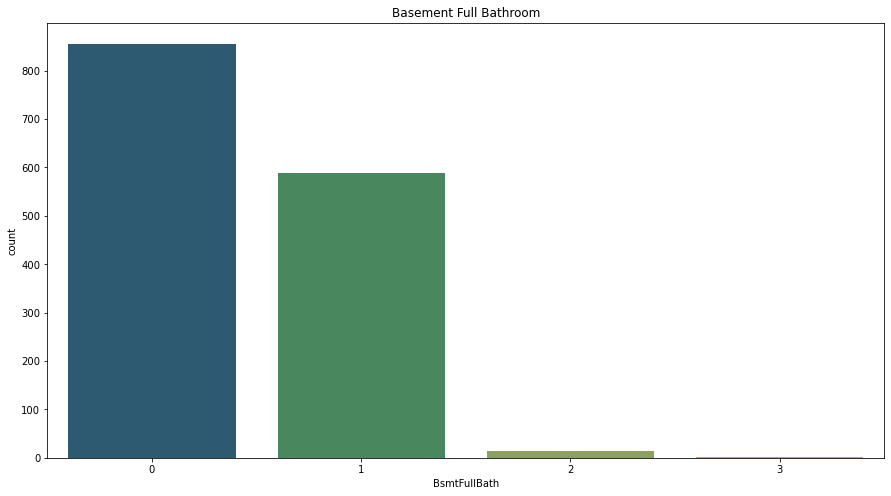

In [63]:
#plotting countplot for the basement bathroom Feature
sns.countplot( df['BsmtFullBath'],palette='gist_earth')
plt.title('Basement Full Bathroom')
plt.show()

In [64]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

# Capacity of the Car Garage

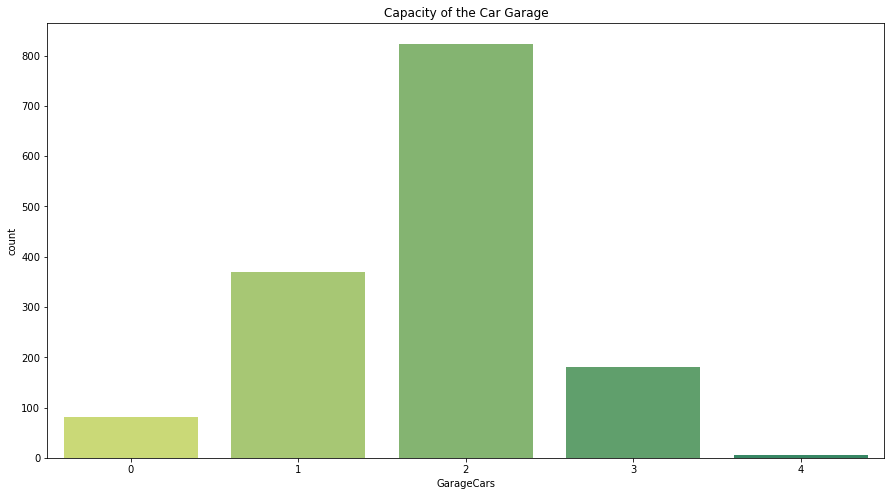

In [65]:
#plotting countplot for Garage Cars
sns.countplot(df["GarageCars"],palette='summer_r')
plt.title('Capacity of the Car Garage')
plt.show()

In [66]:
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

From the graph we get to know that .In most of the Houses in Ames the Garage Capacity is 2,
Were in there Garage 2 Cars can be parked. 

# LotFrontage

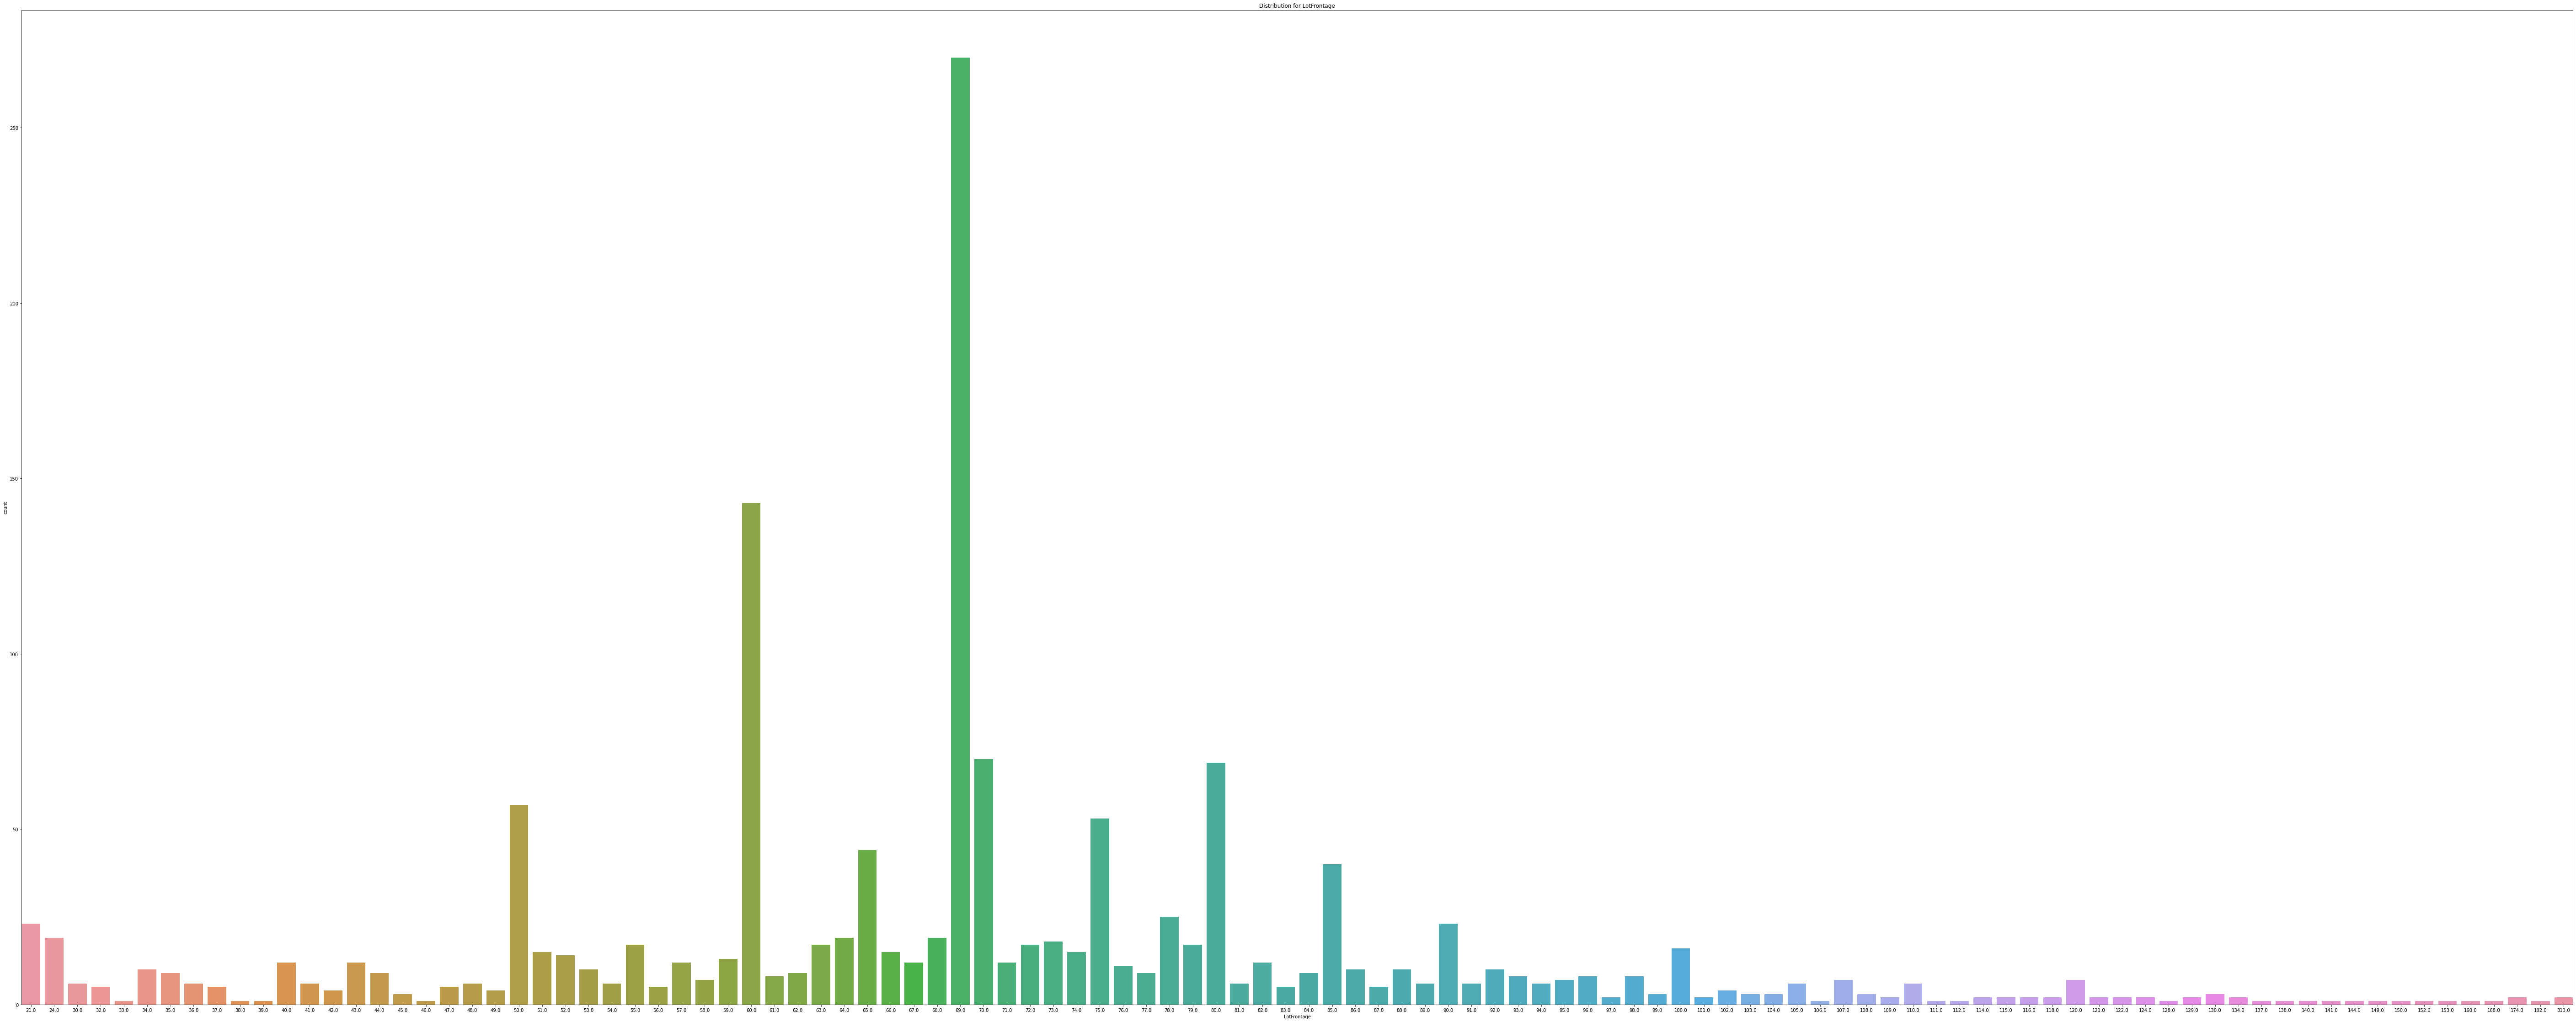

In [67]:
#plotting kernel distribution graph for the LotFrontage feature
plt.figure(figsize=(100,40))
sns.countplot(df["LotFrontage"])
plt.title('Distribution for LotFrontage')
plt.margins(x=0,tight=True)
plt.show()

In [68]:
import sweetviz as sv

report=sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…


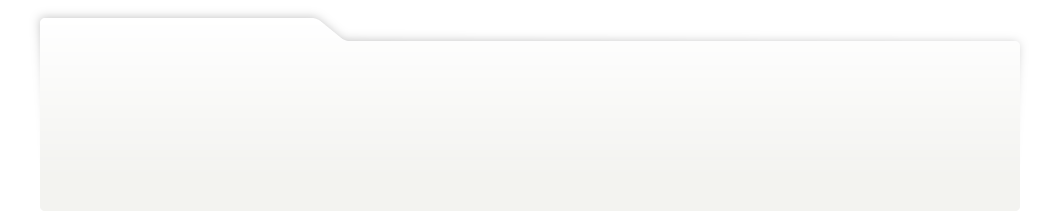
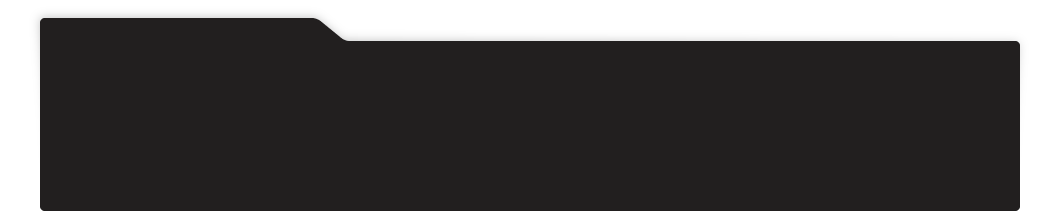
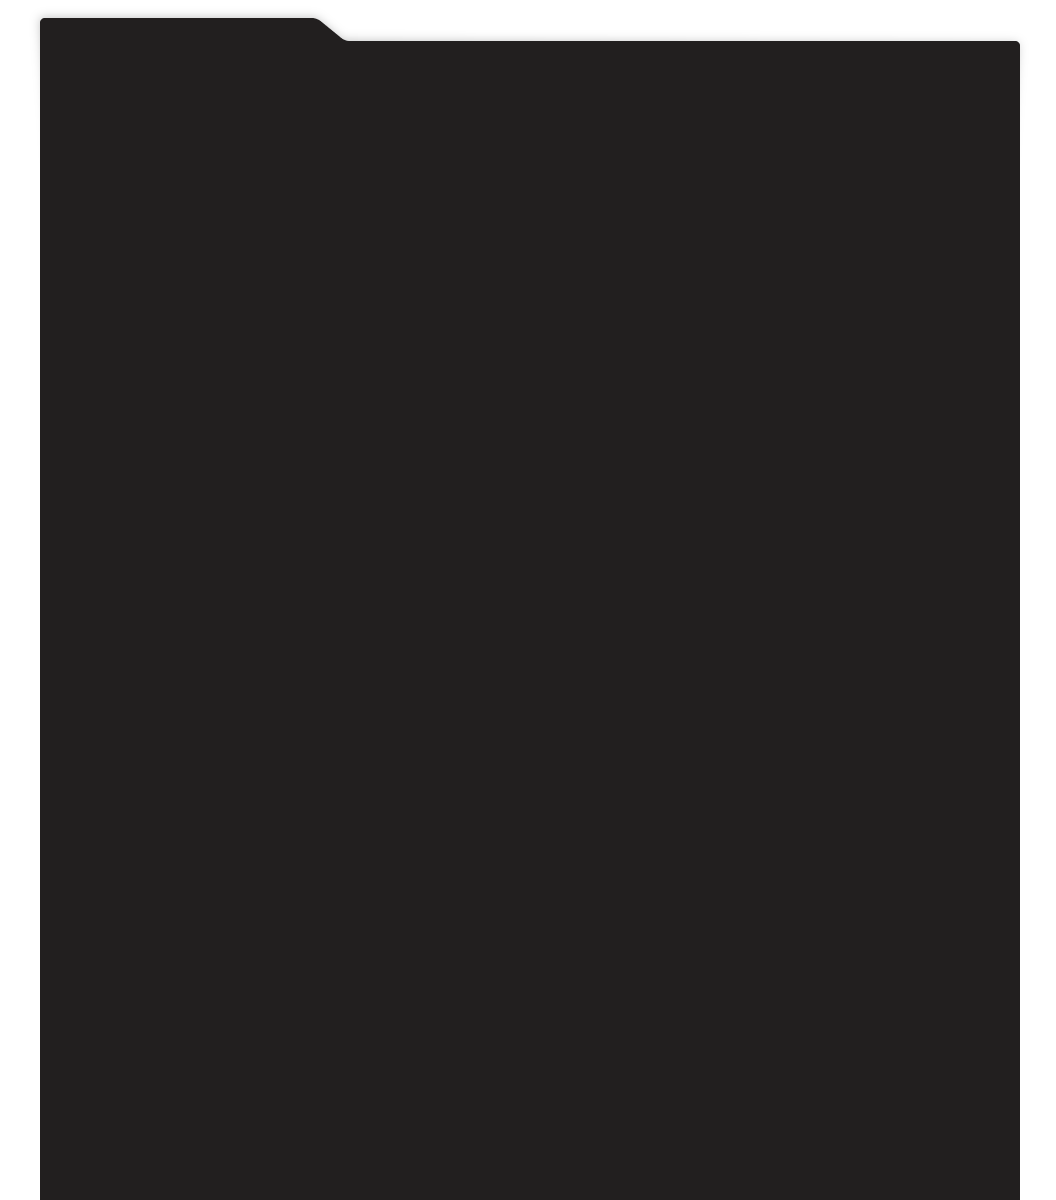
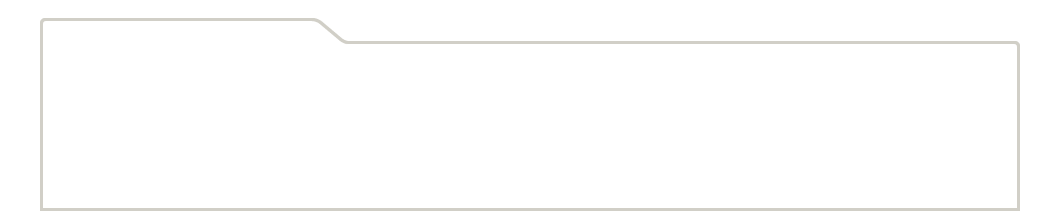
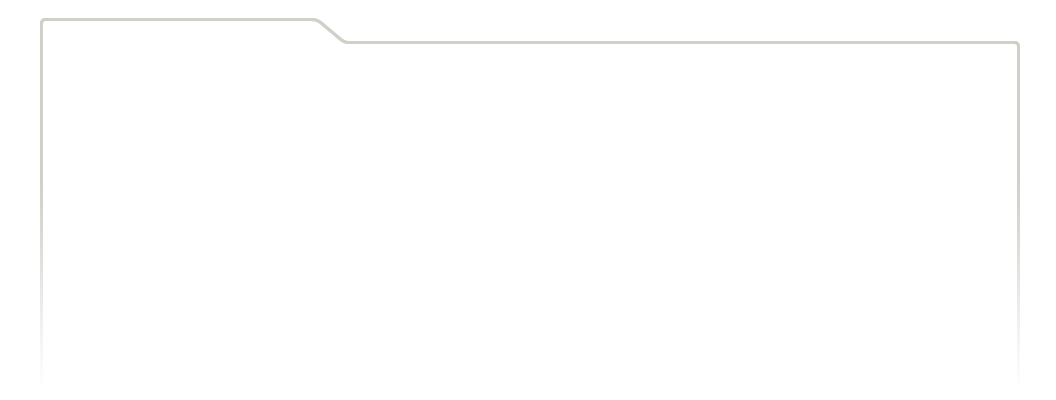
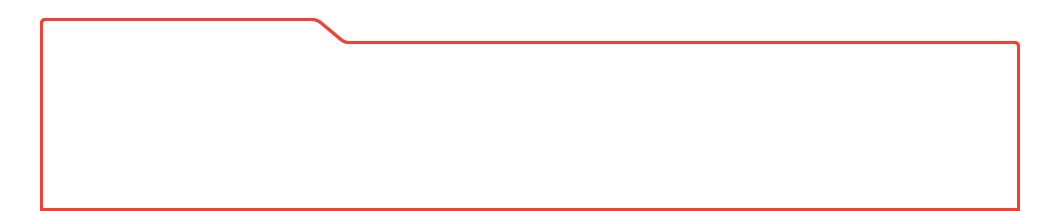
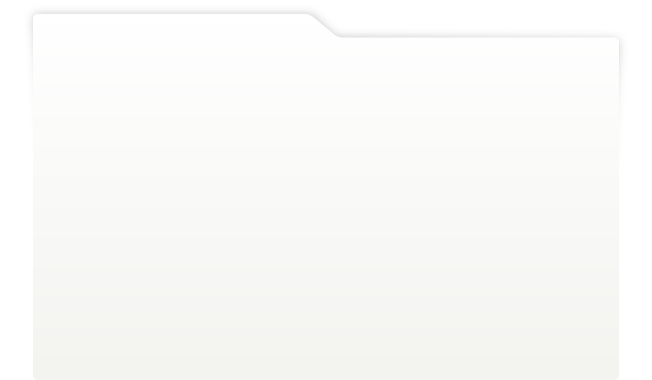
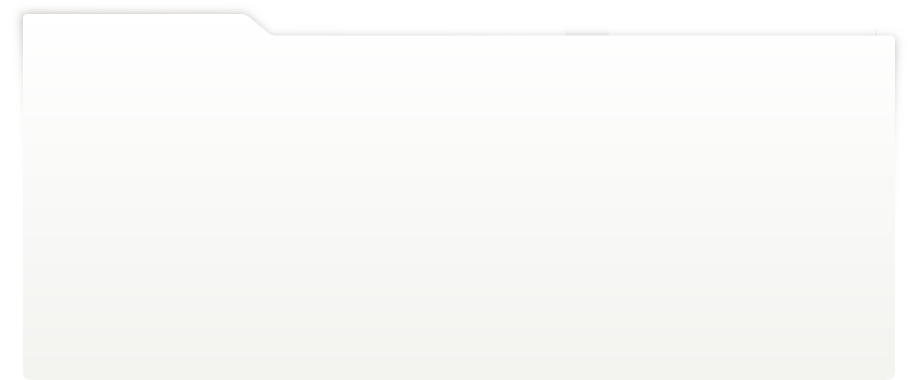
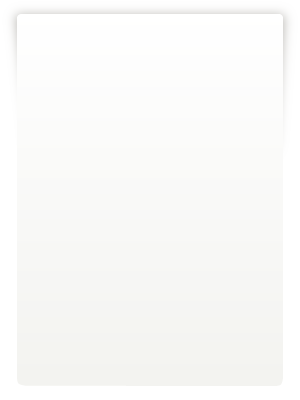
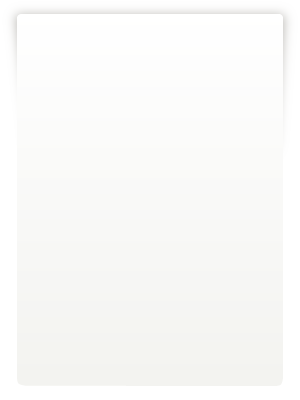
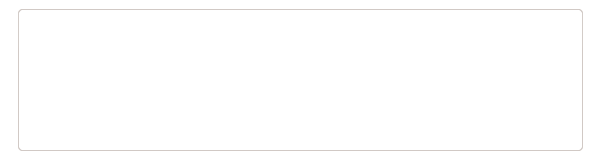
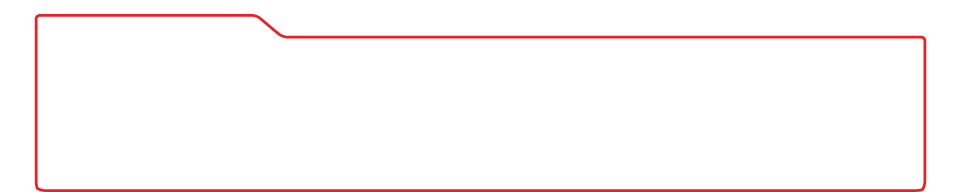
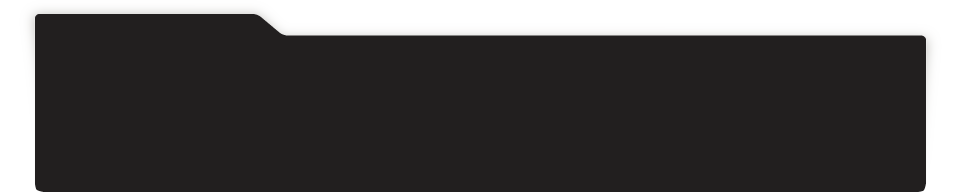
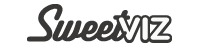
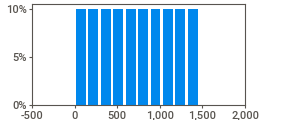
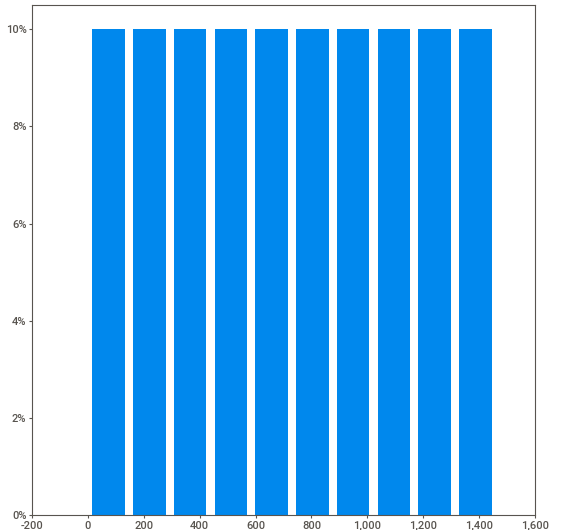
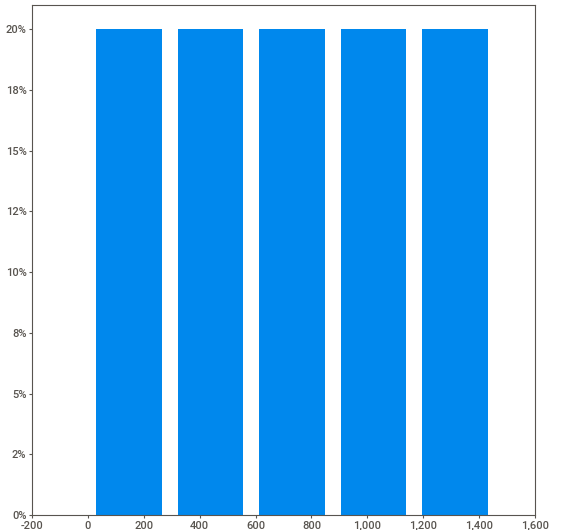
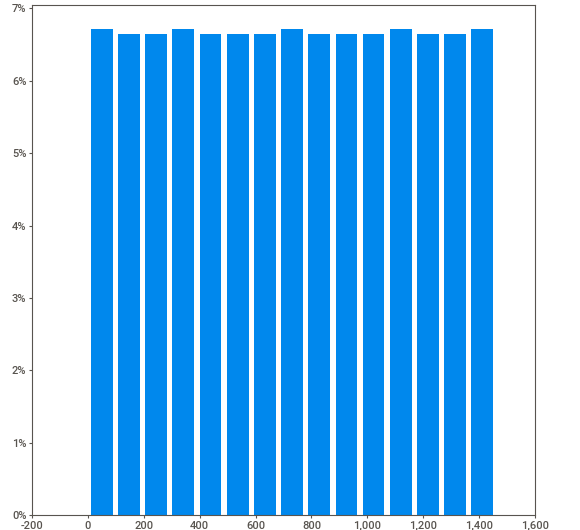
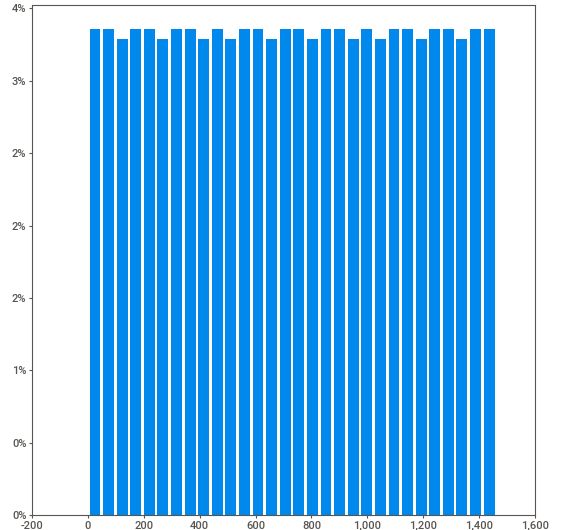
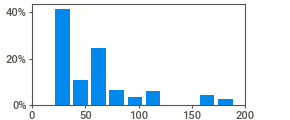
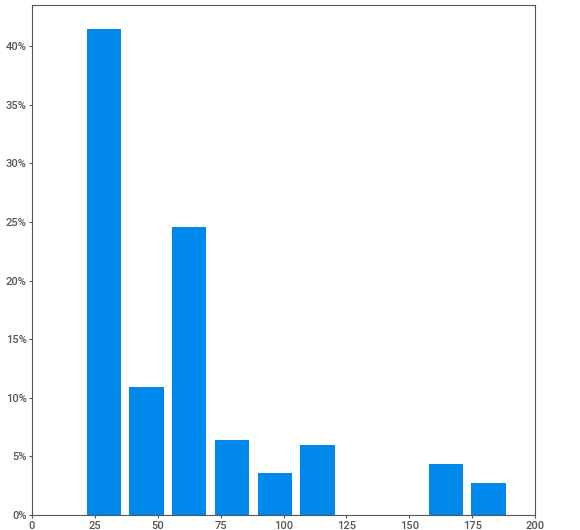
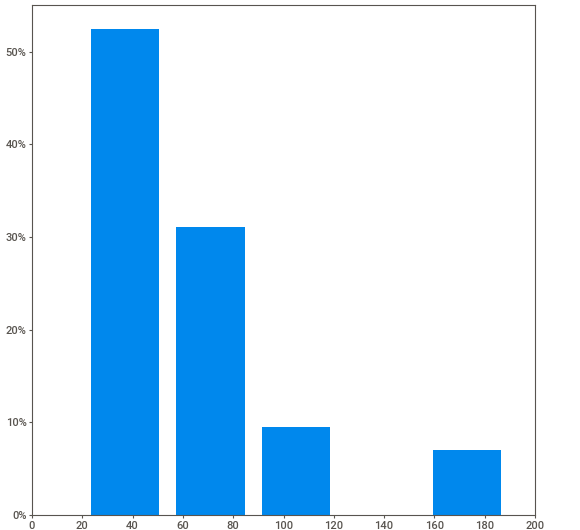
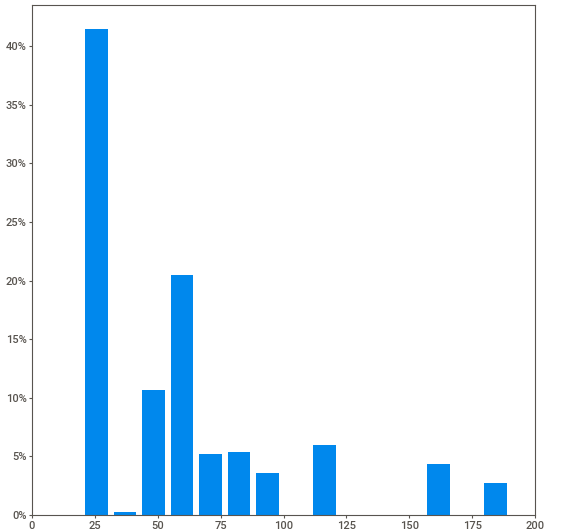
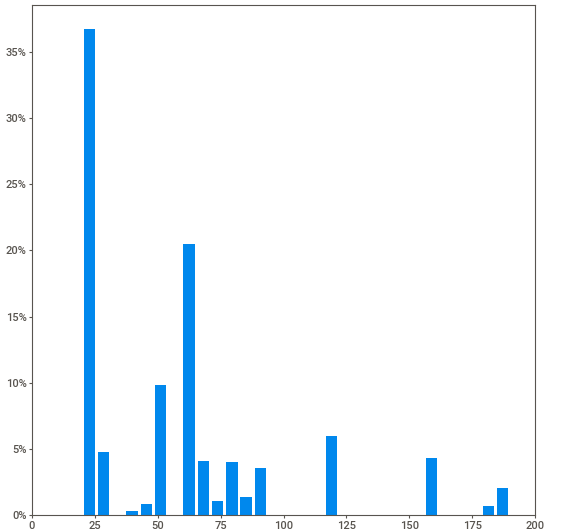
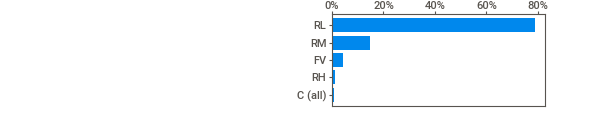
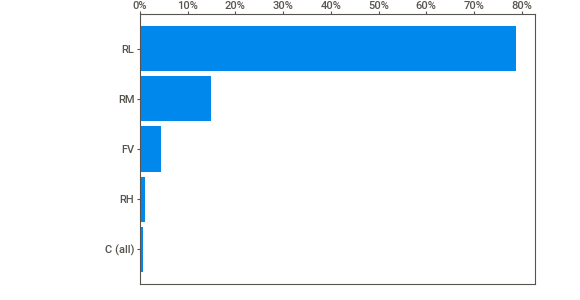
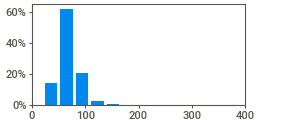
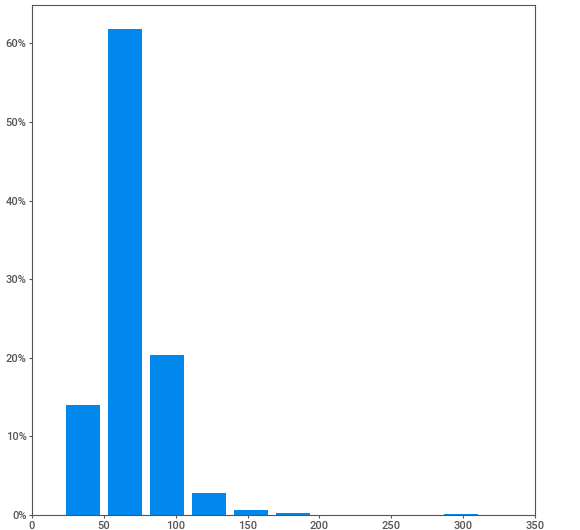
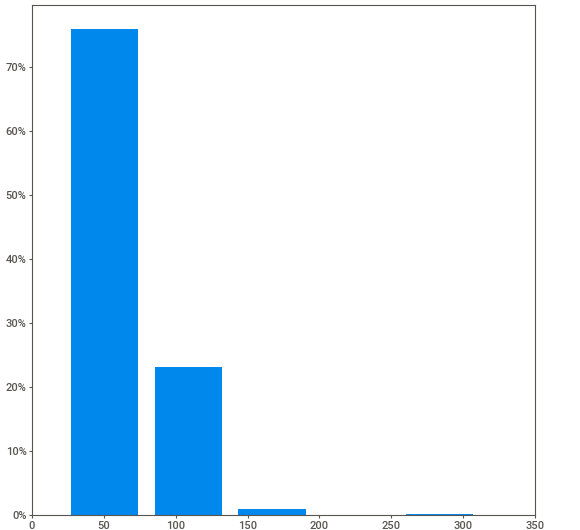
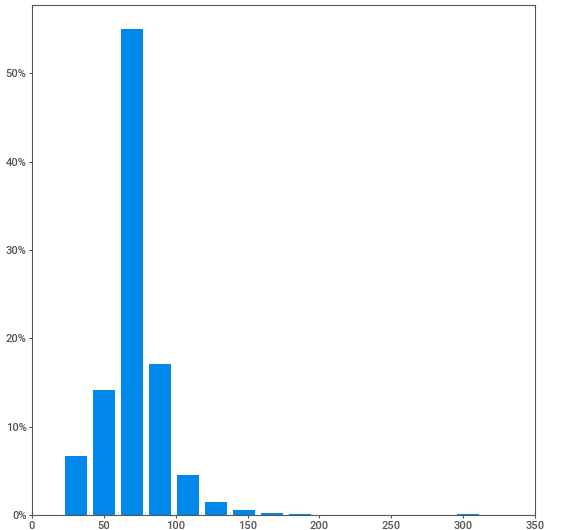
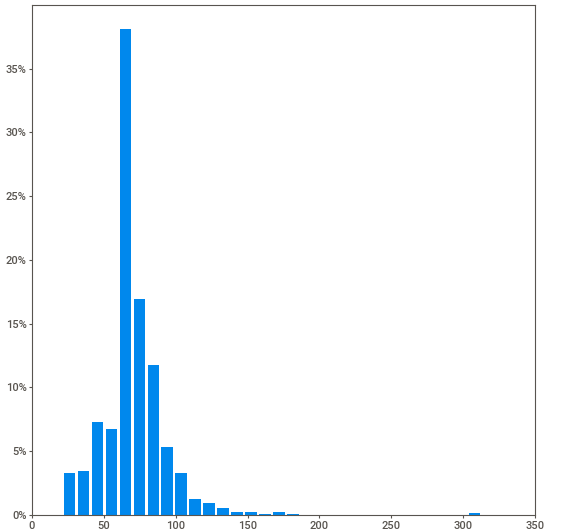
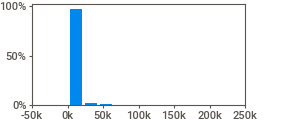
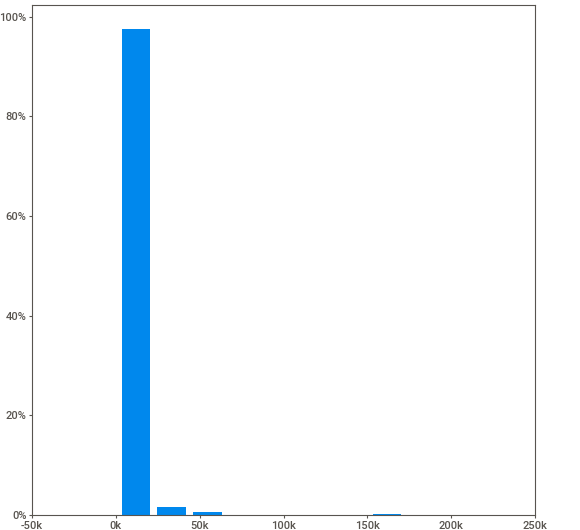
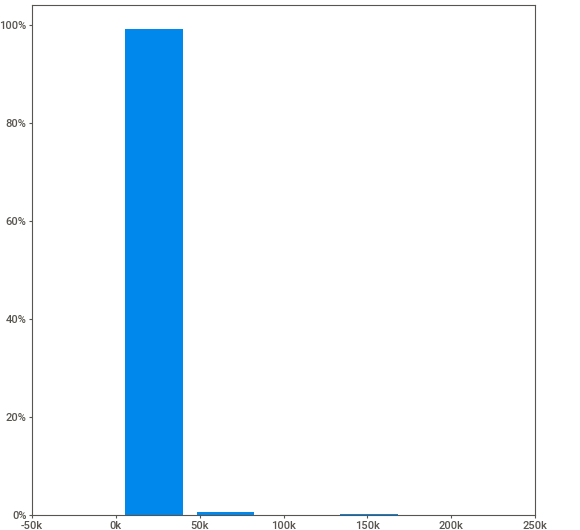
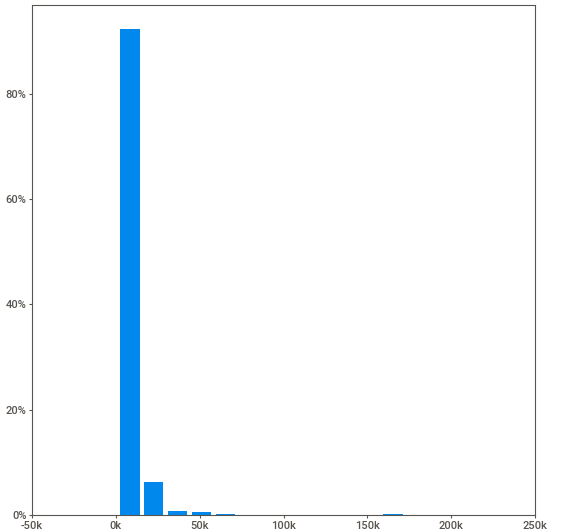
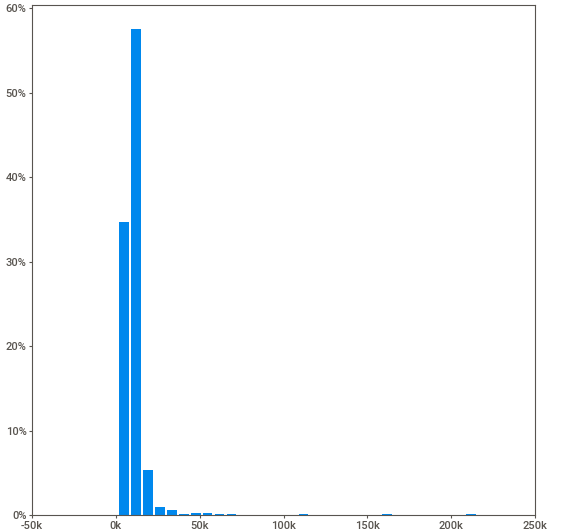
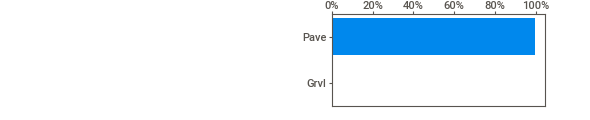
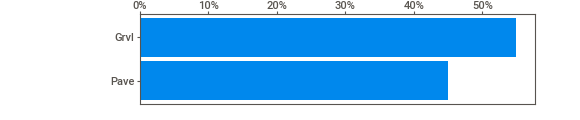
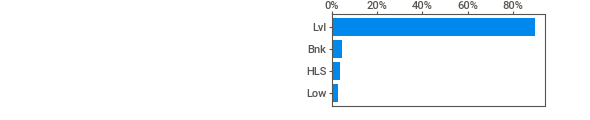
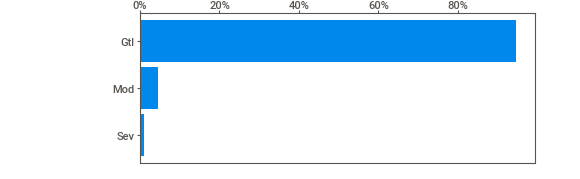
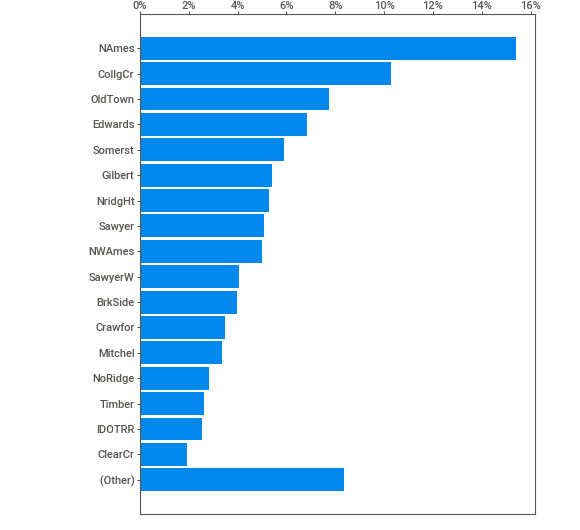
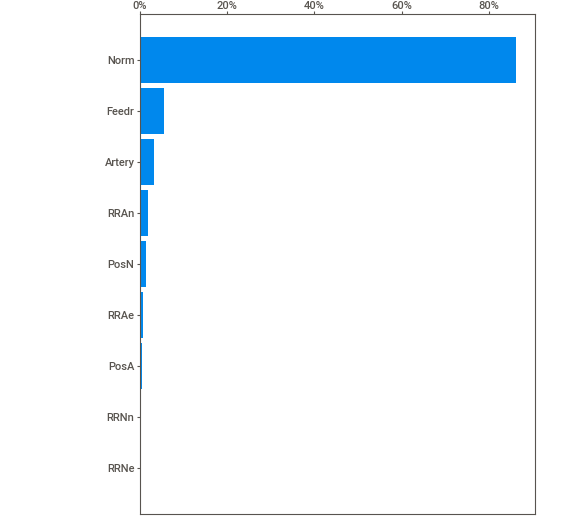
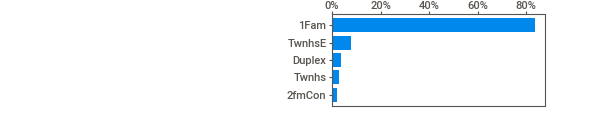
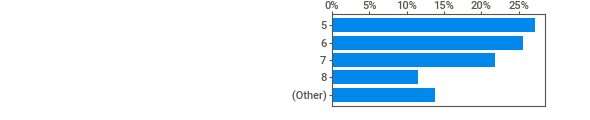
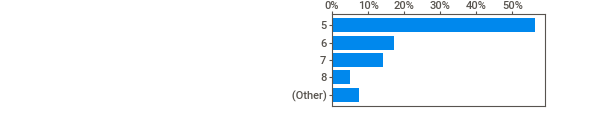
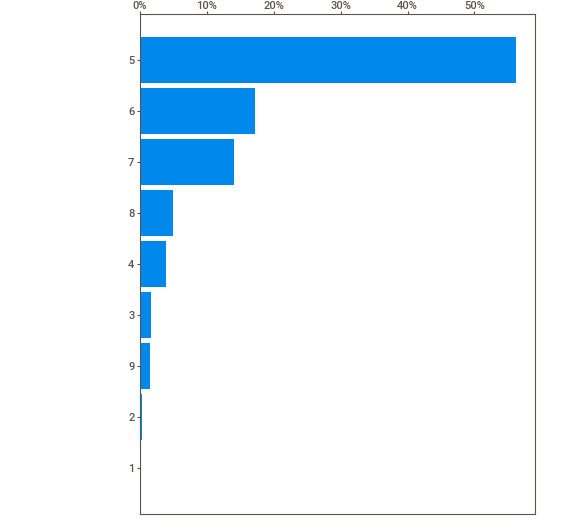
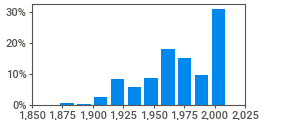
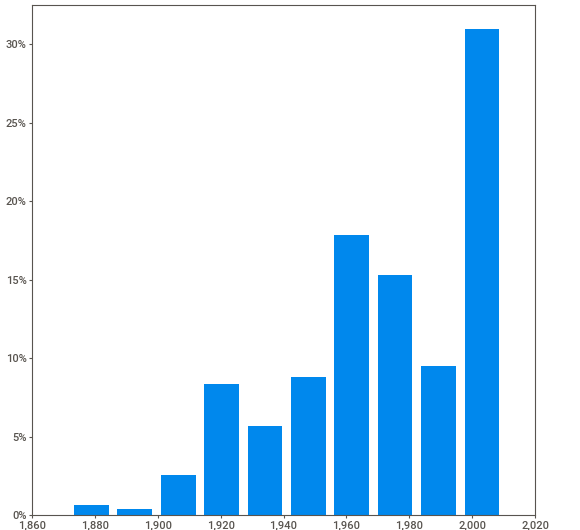
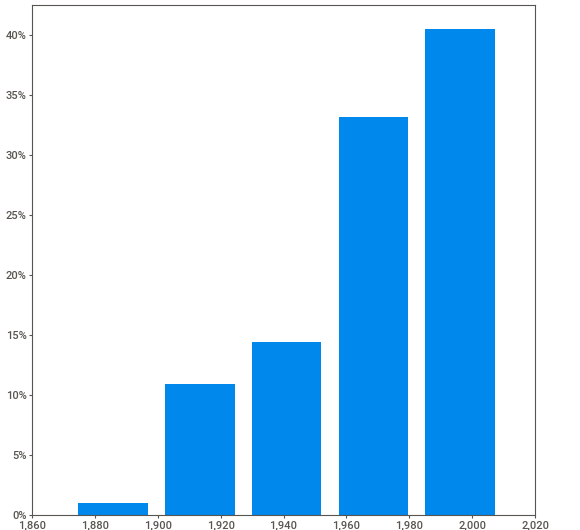
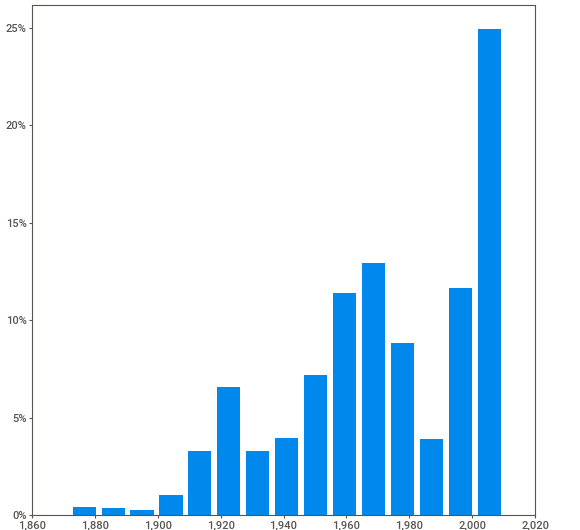
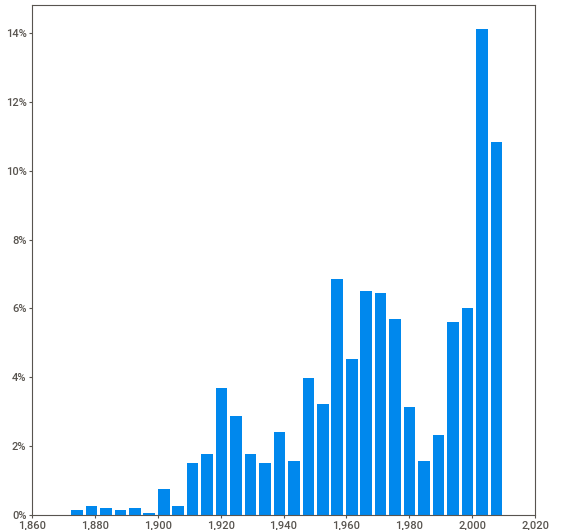
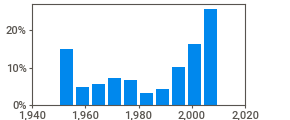
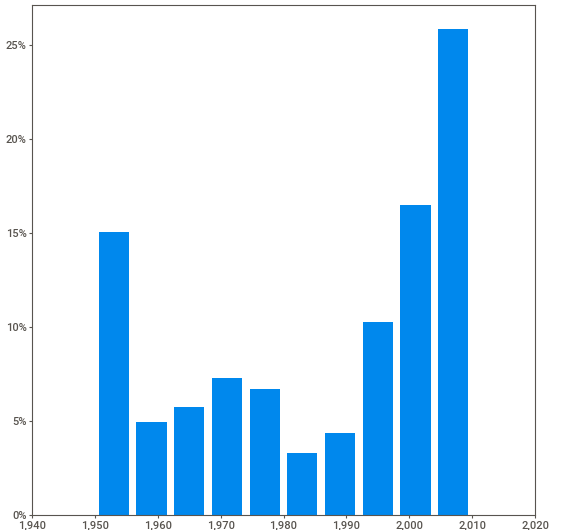
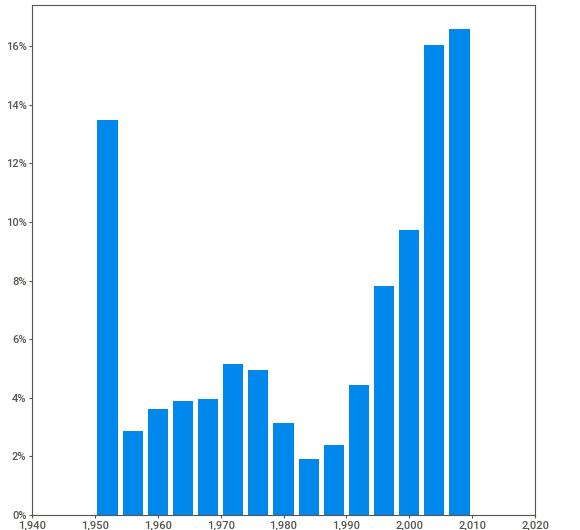
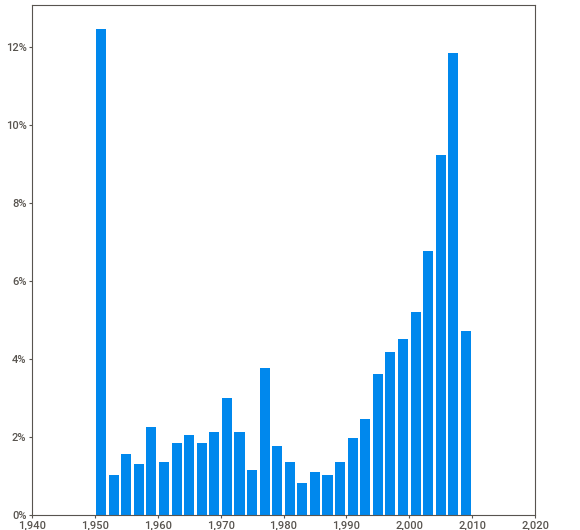
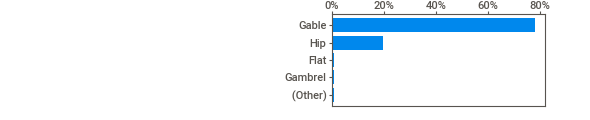
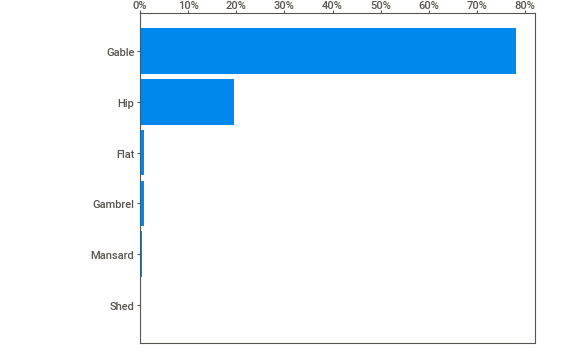
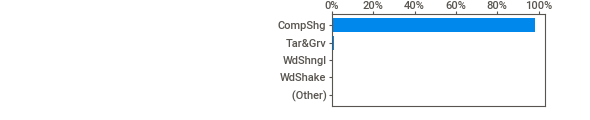
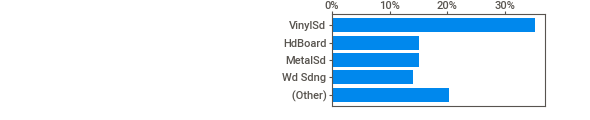
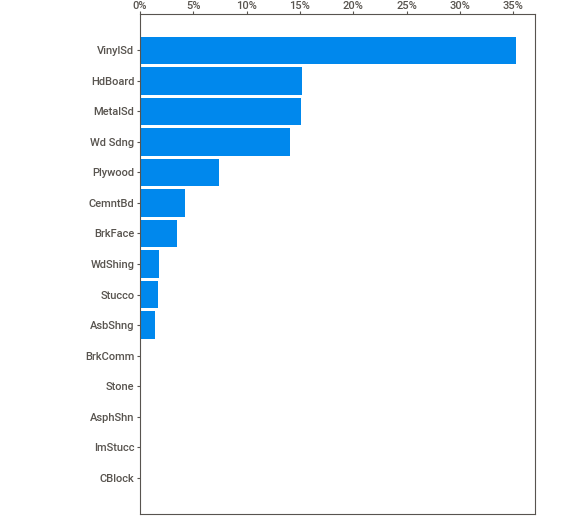
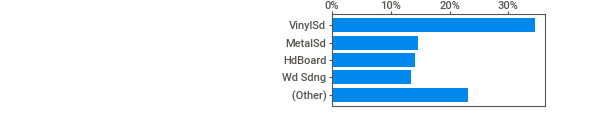
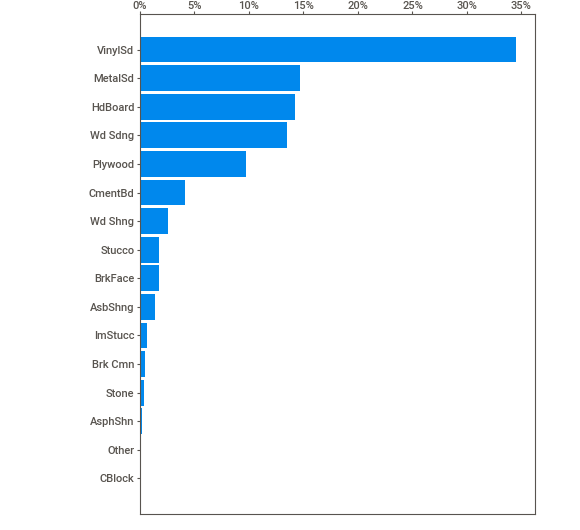
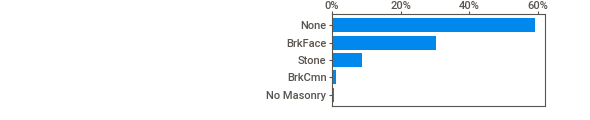
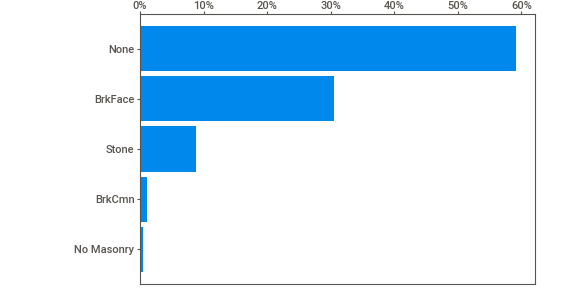
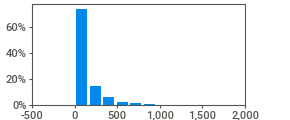
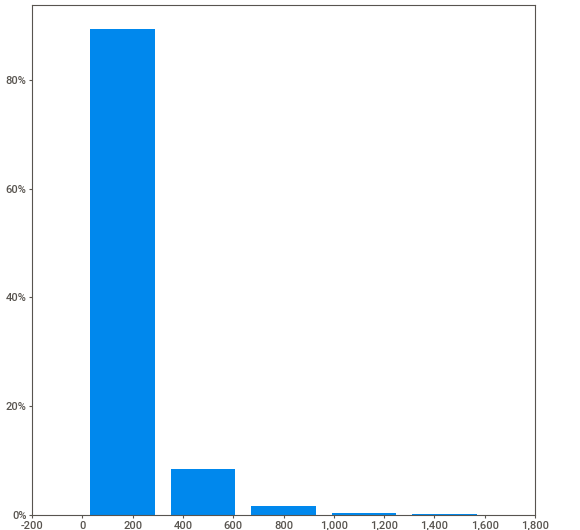
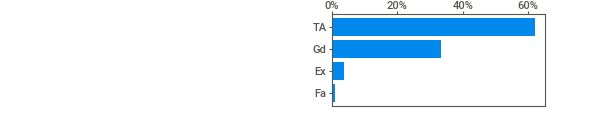
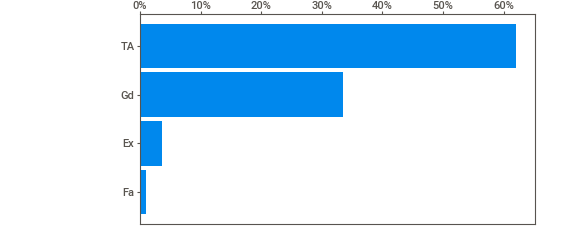
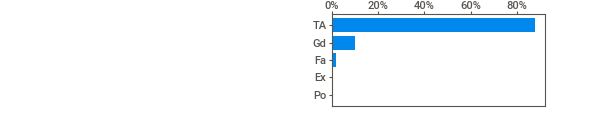
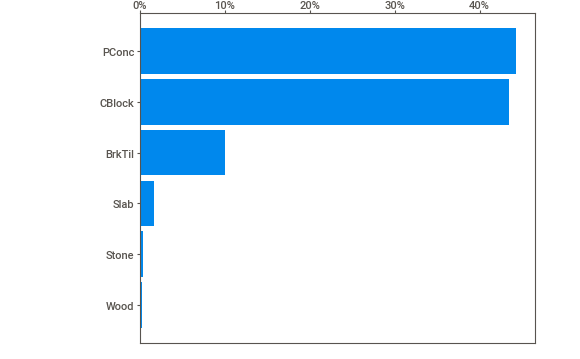
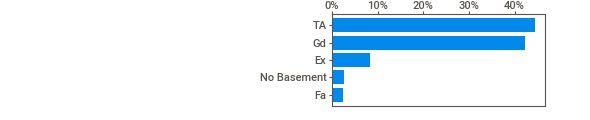
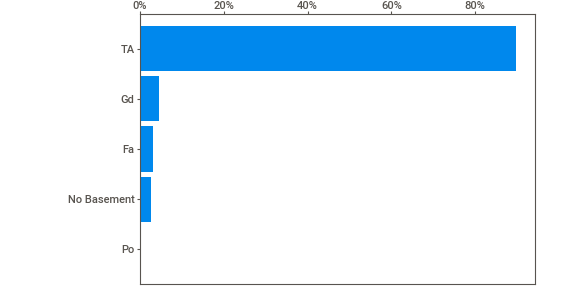
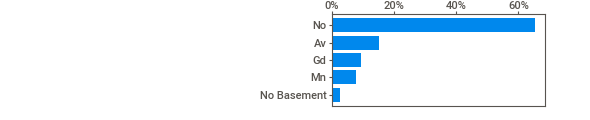
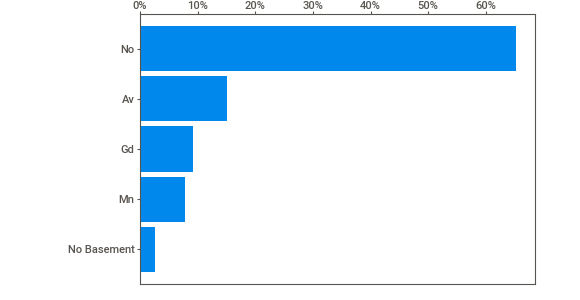
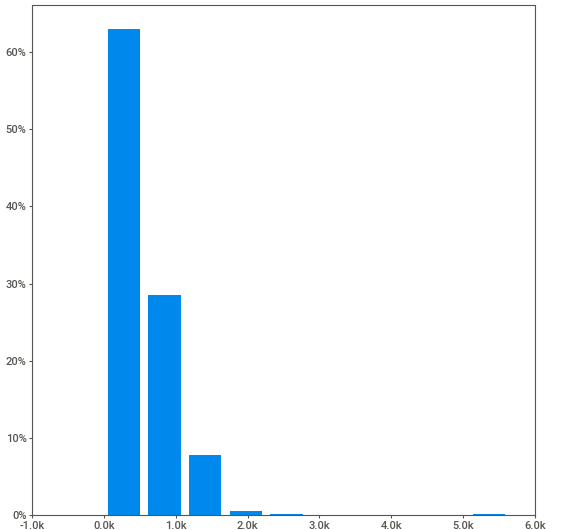
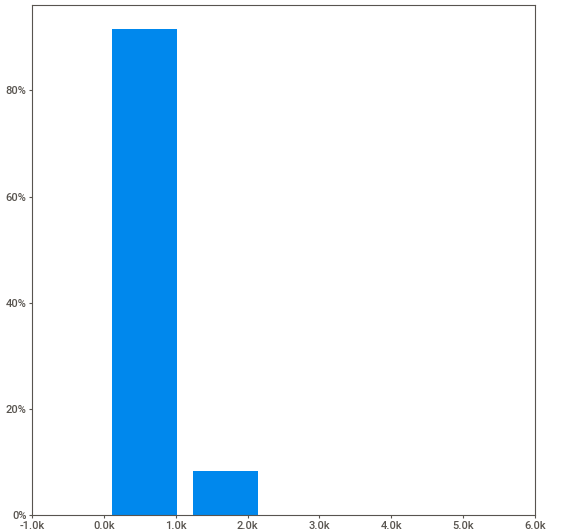
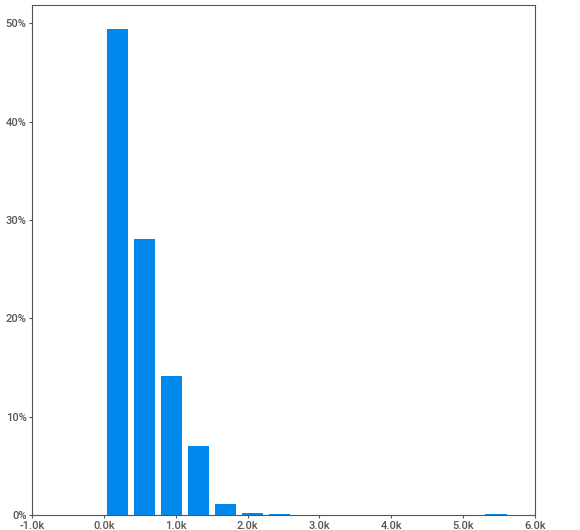
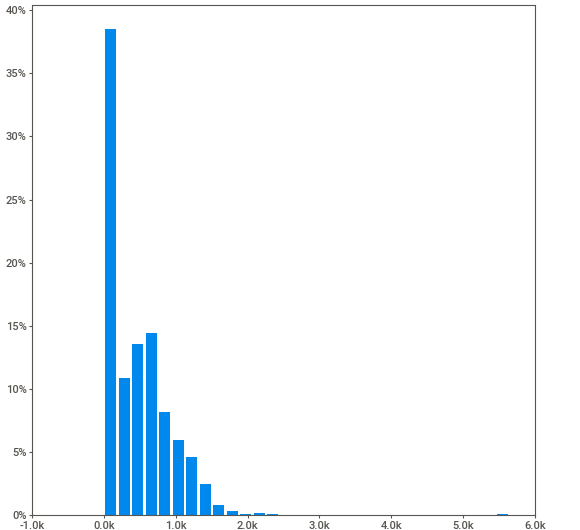
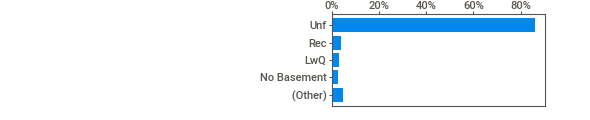
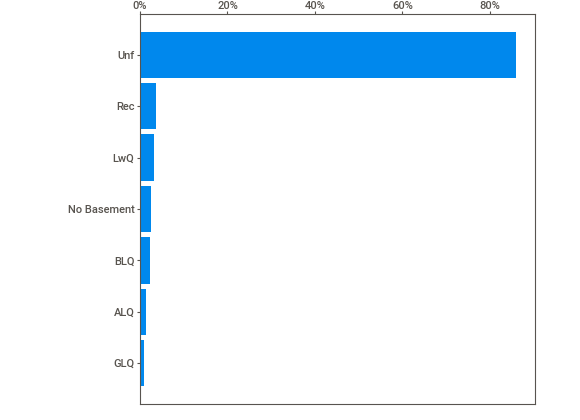
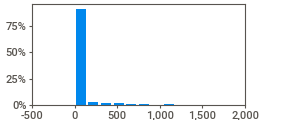
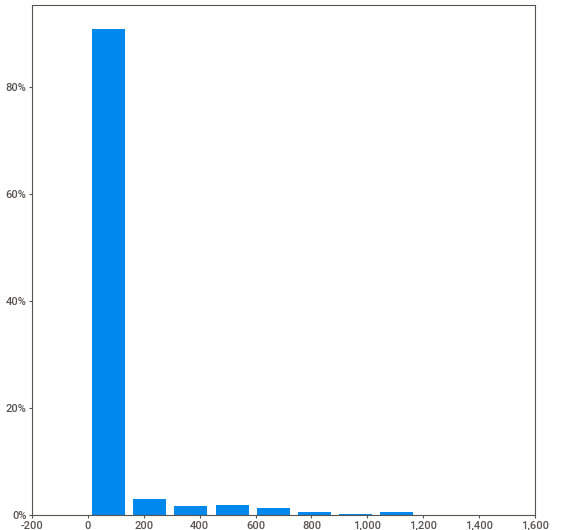
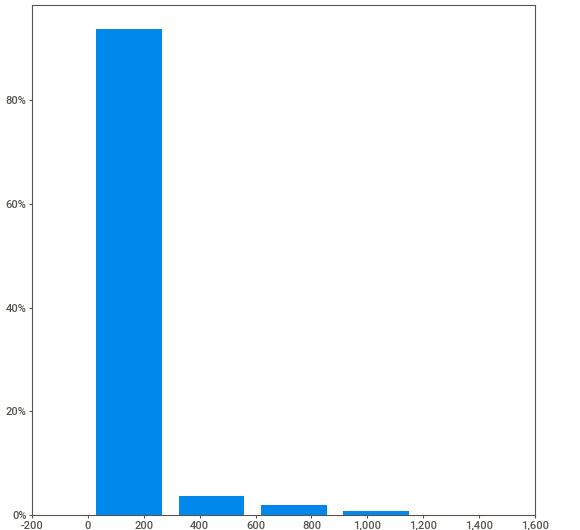
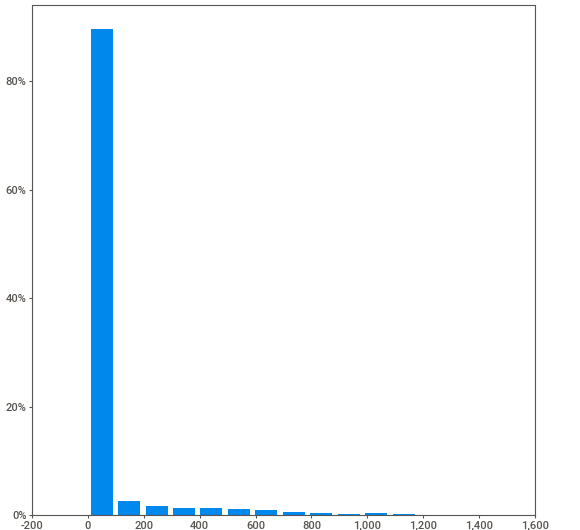
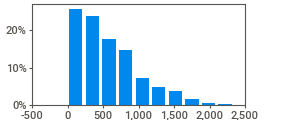
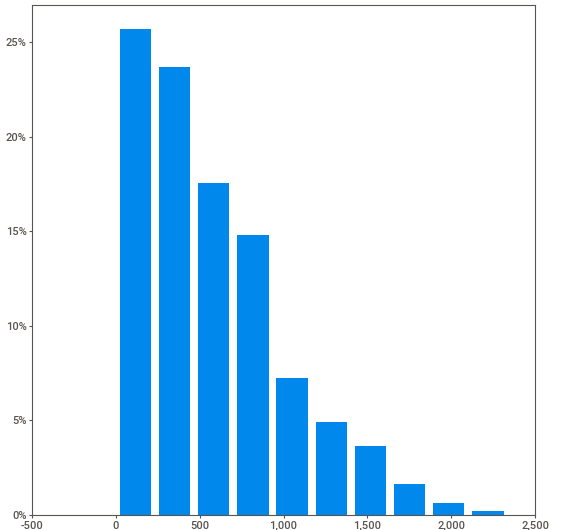
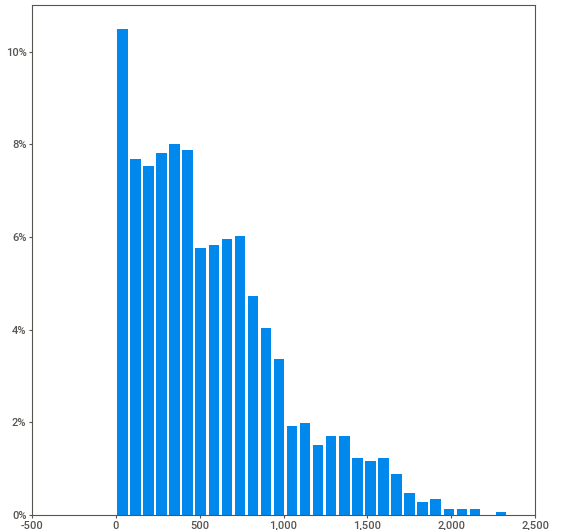
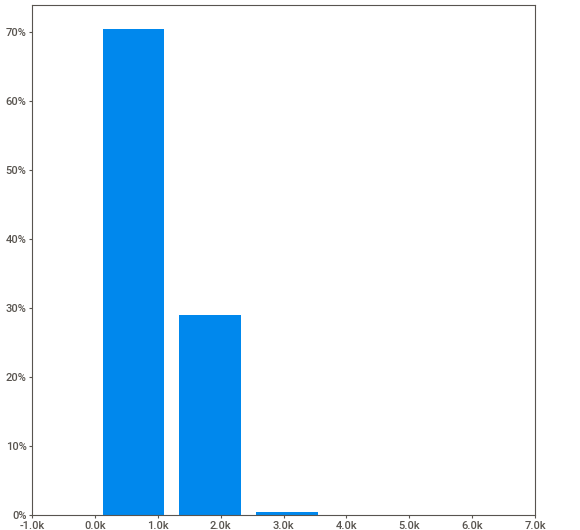
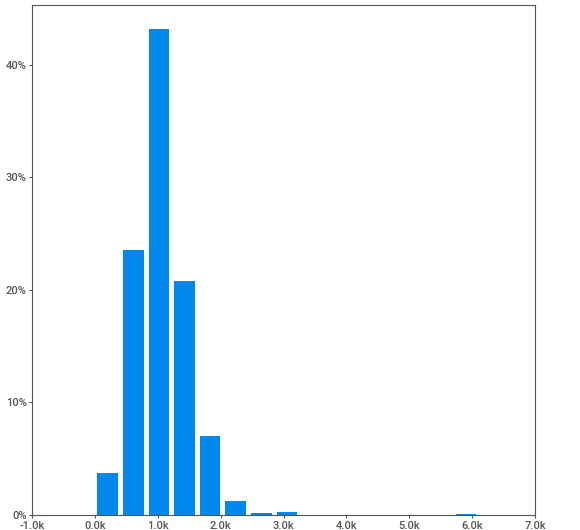
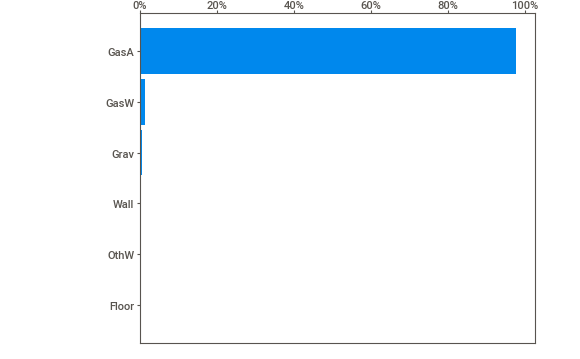
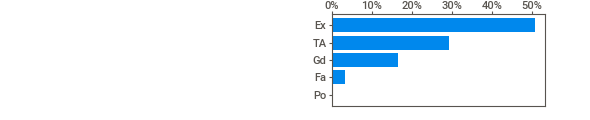
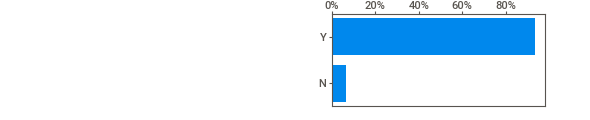
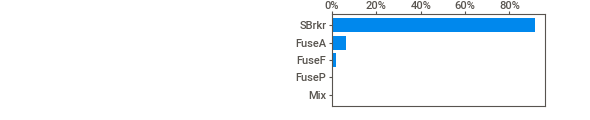
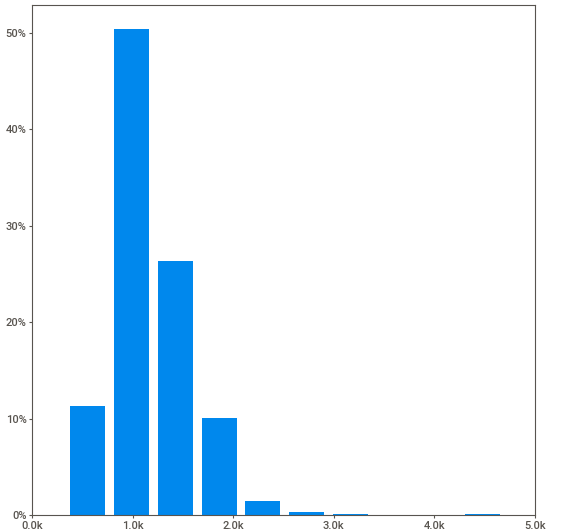
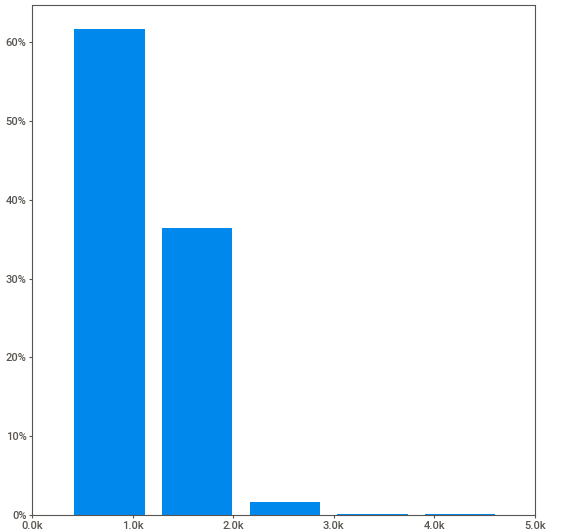
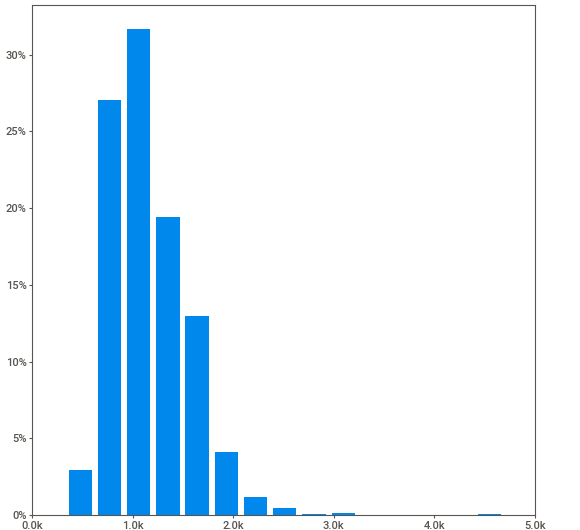
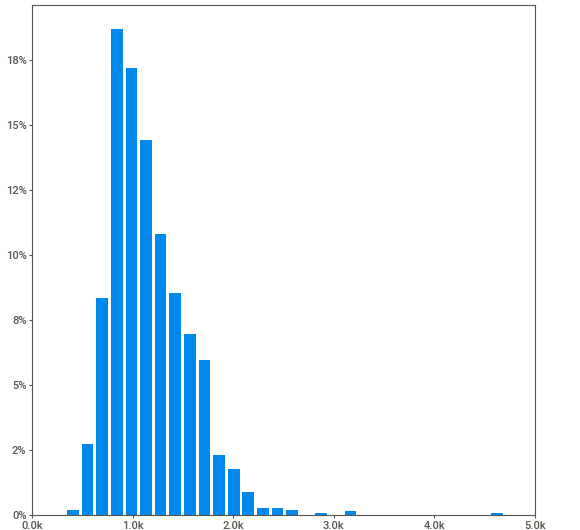
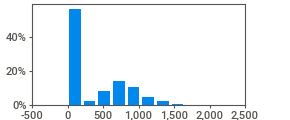
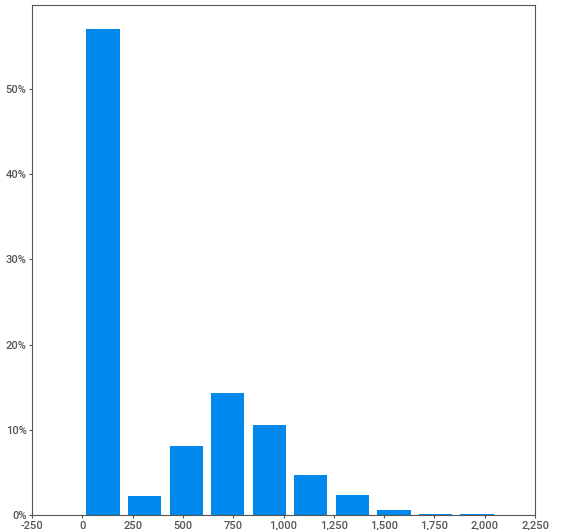
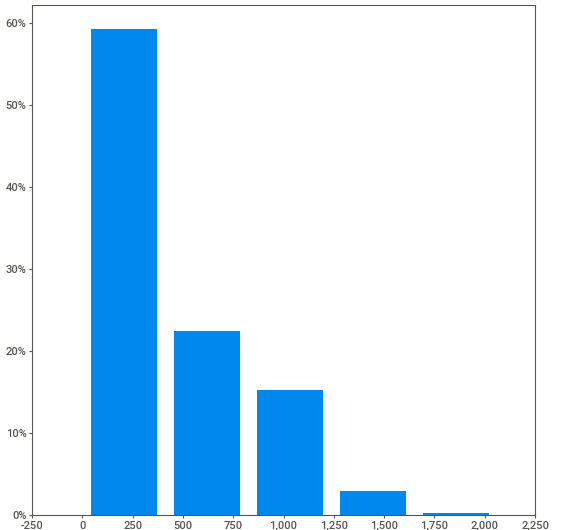
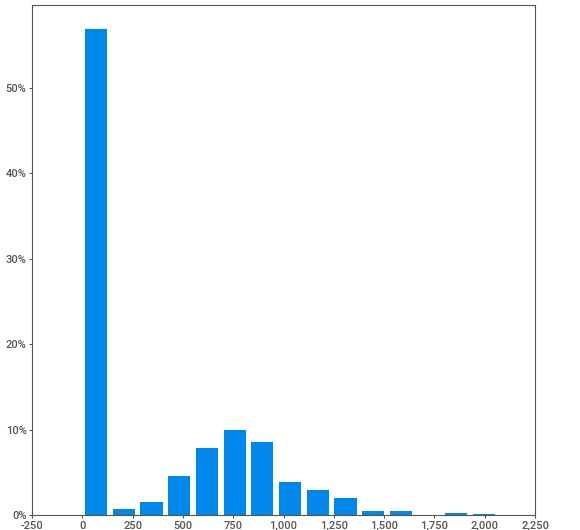
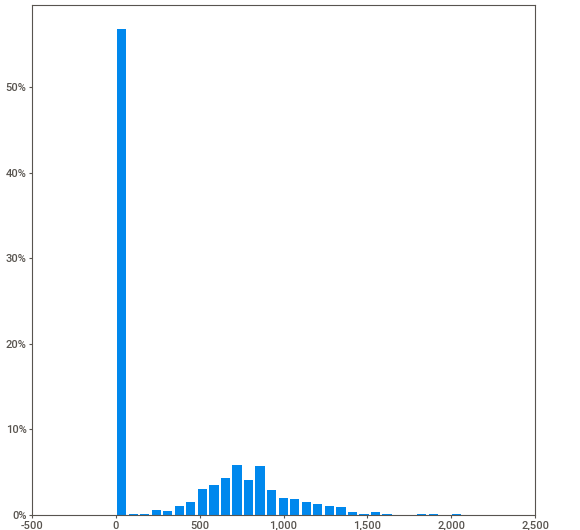
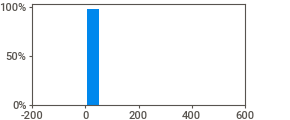
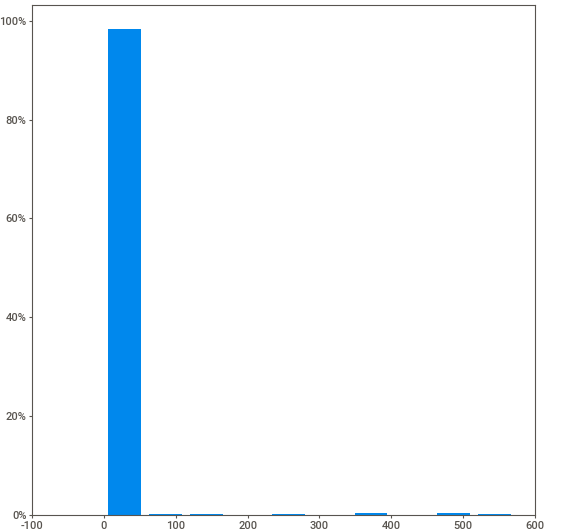
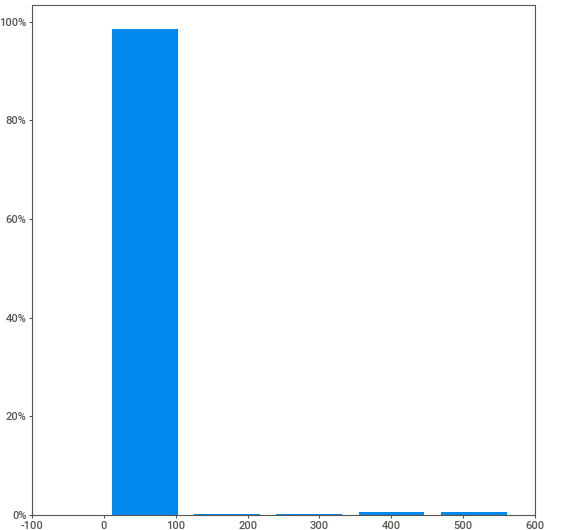
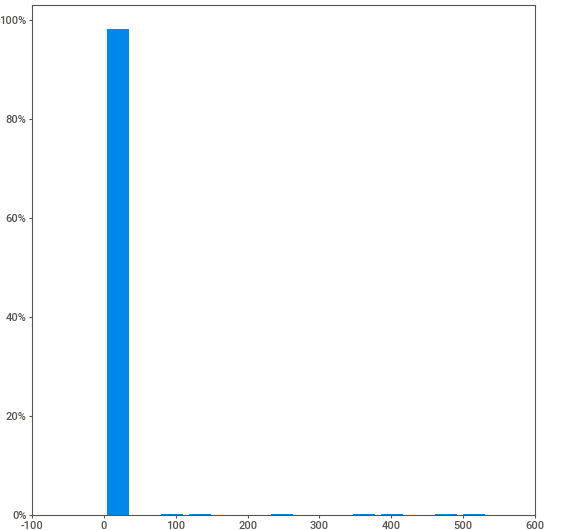
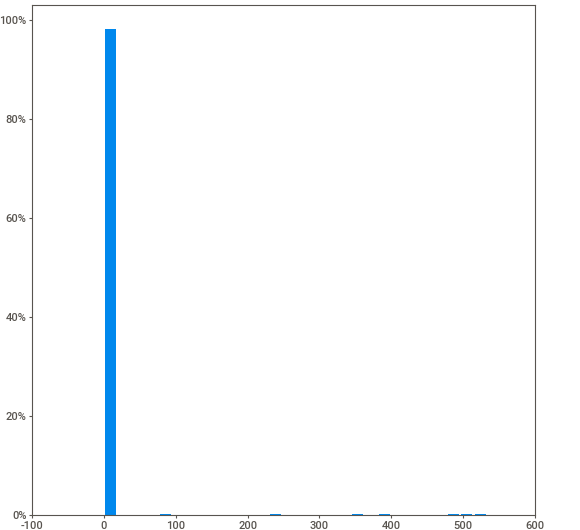
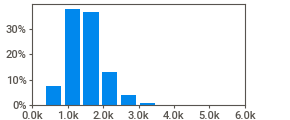
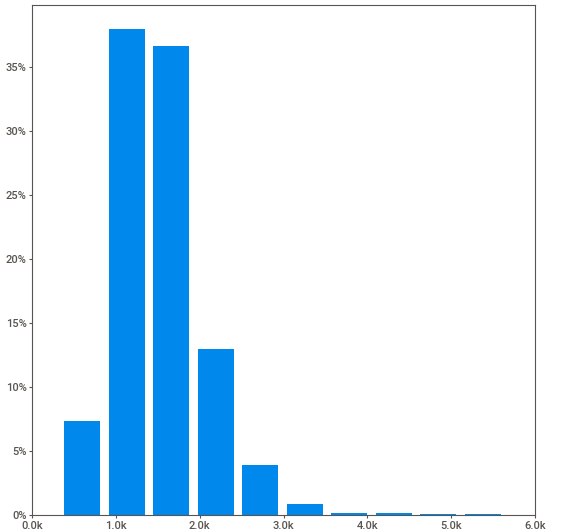
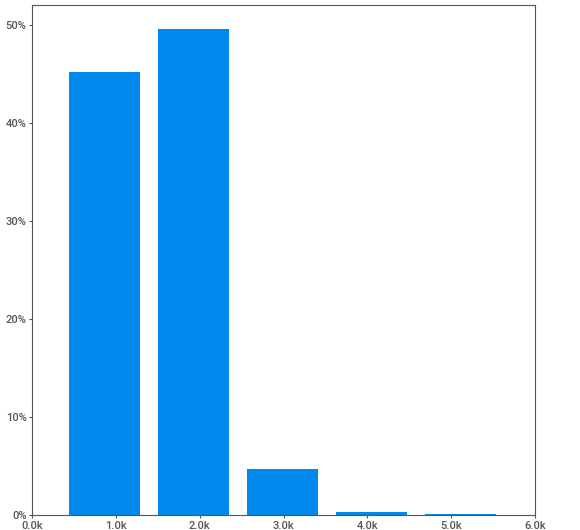
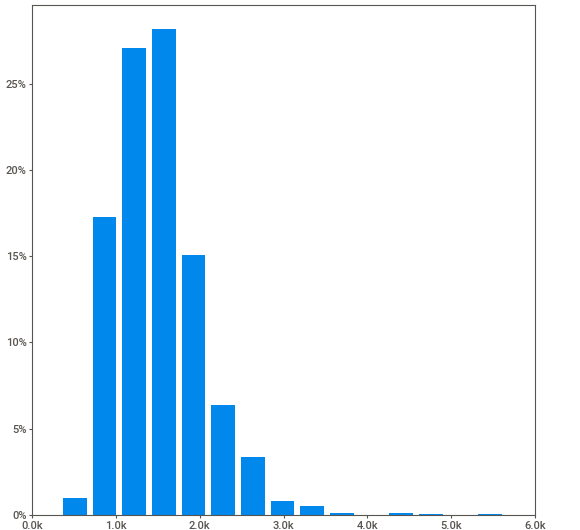
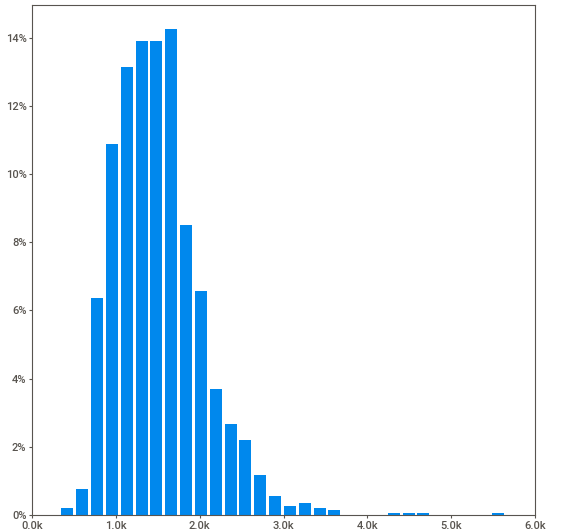
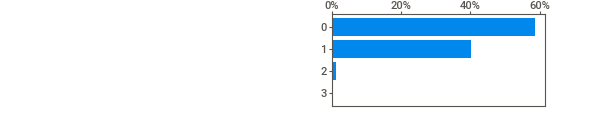
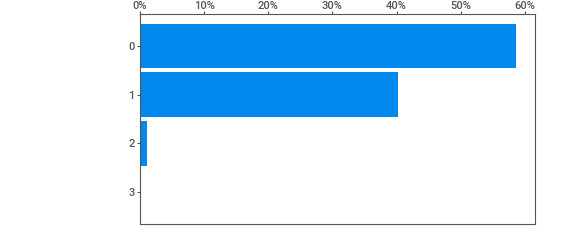
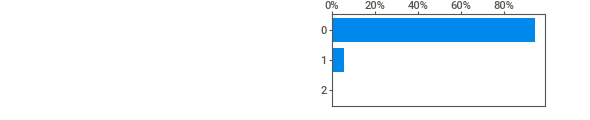
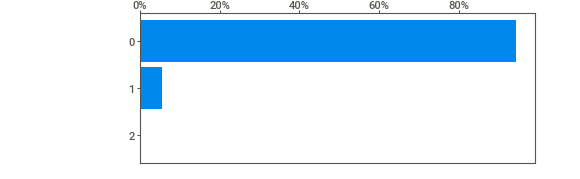
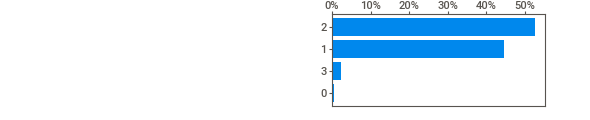
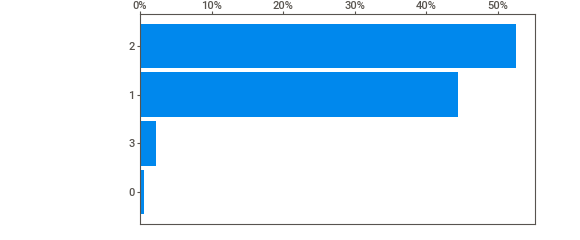
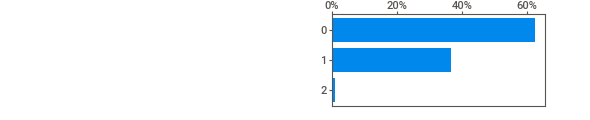
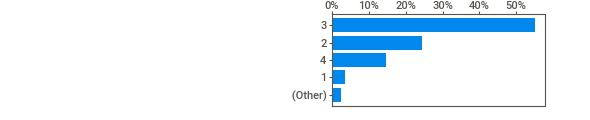
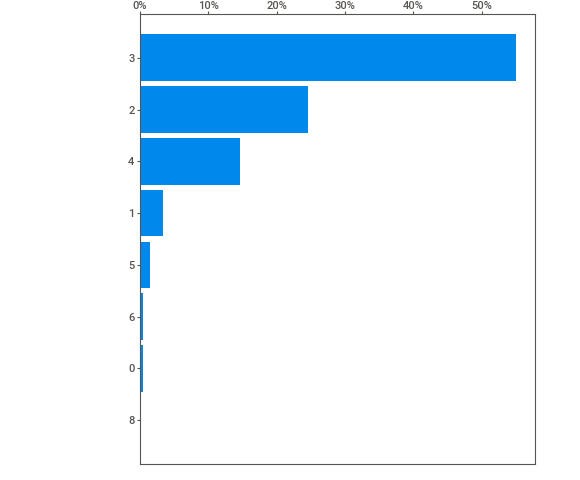
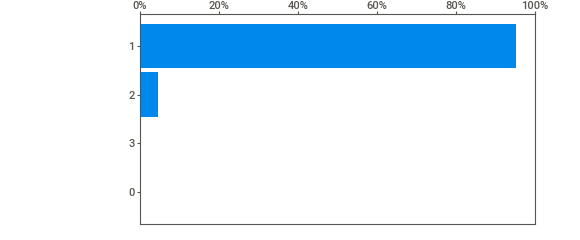
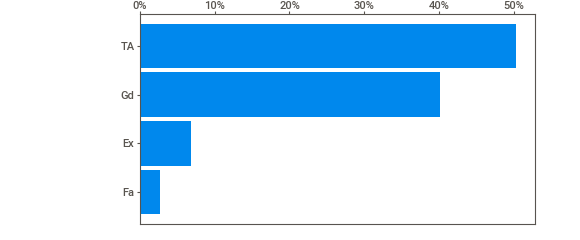
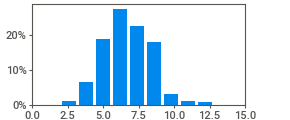
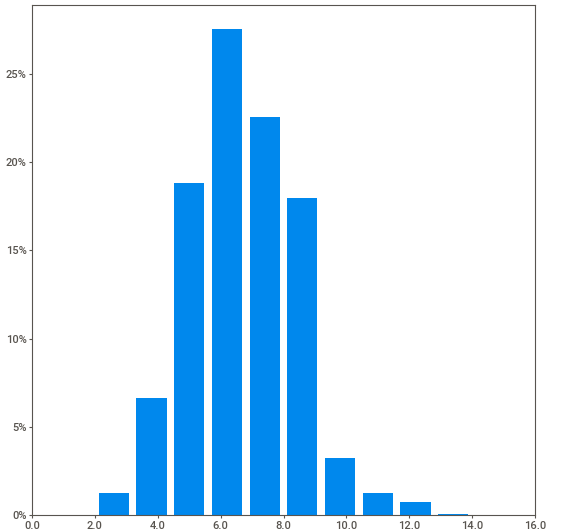
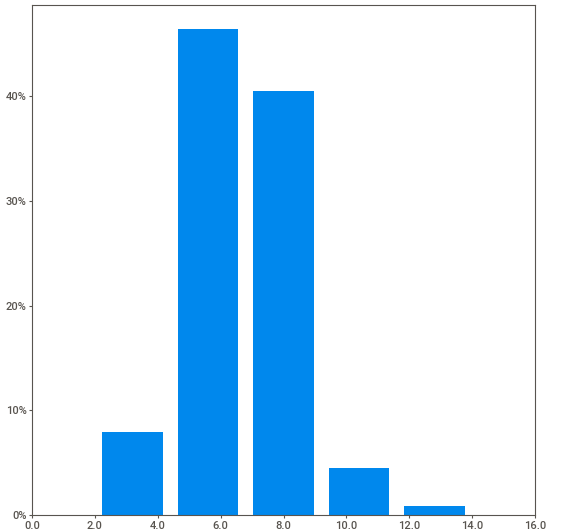
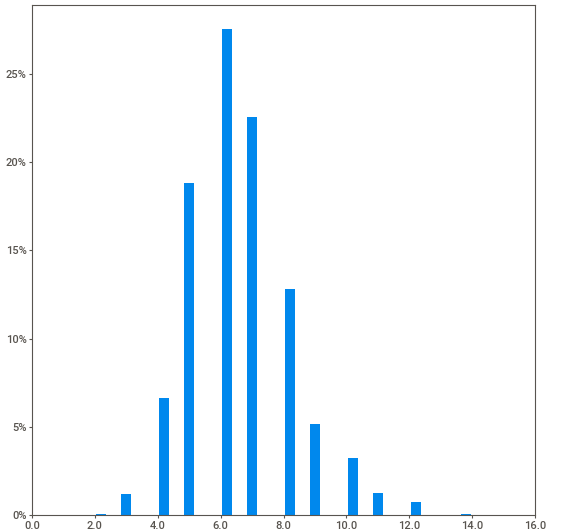
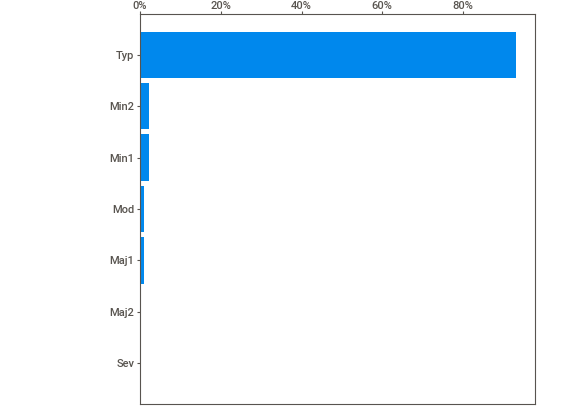
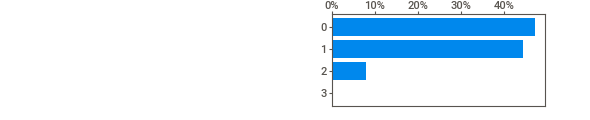
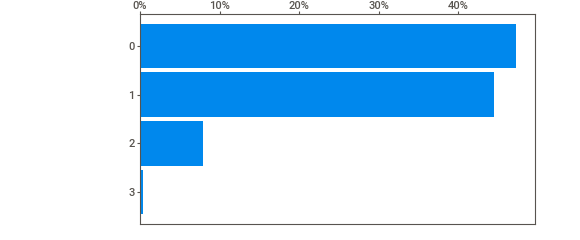
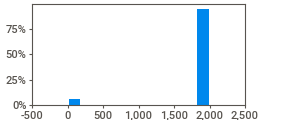
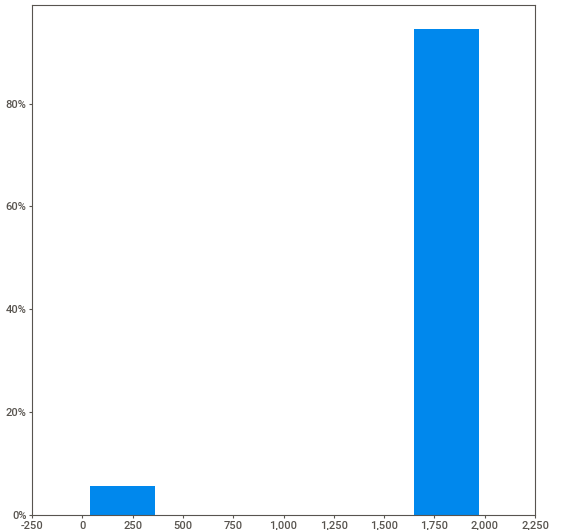
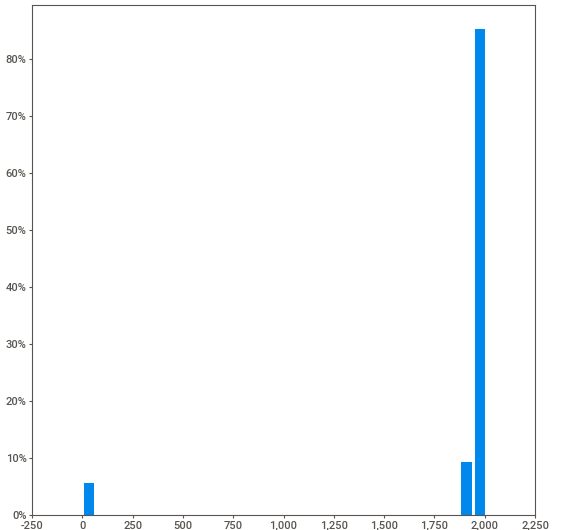
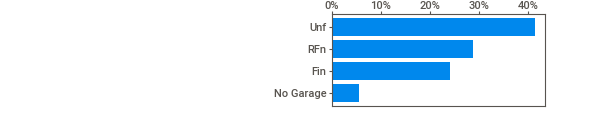
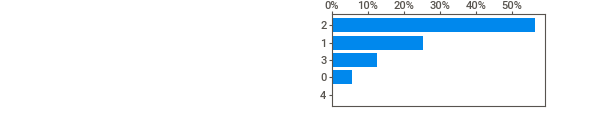
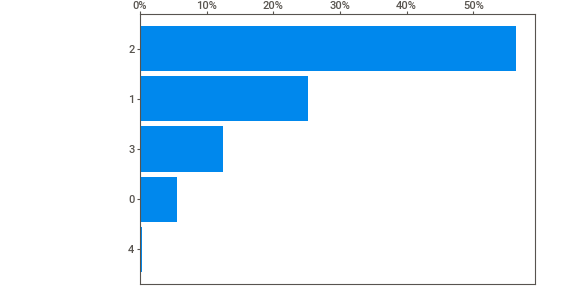
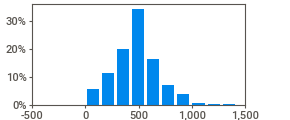
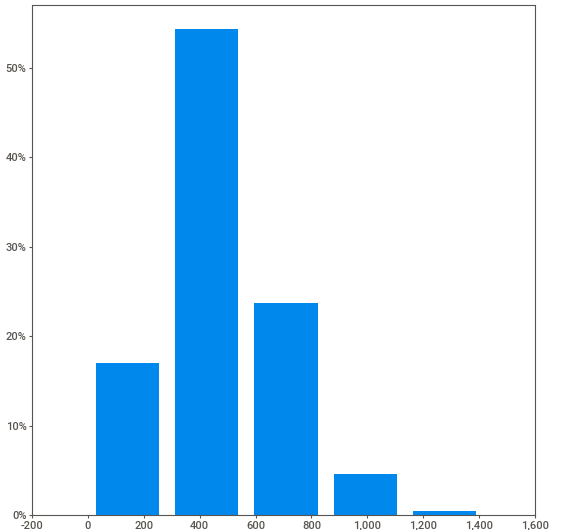
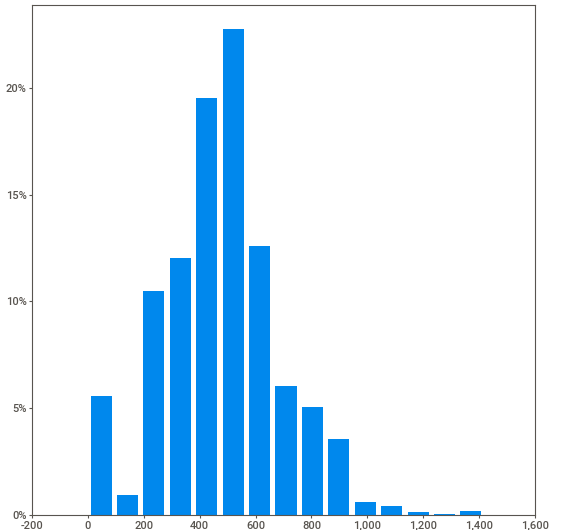
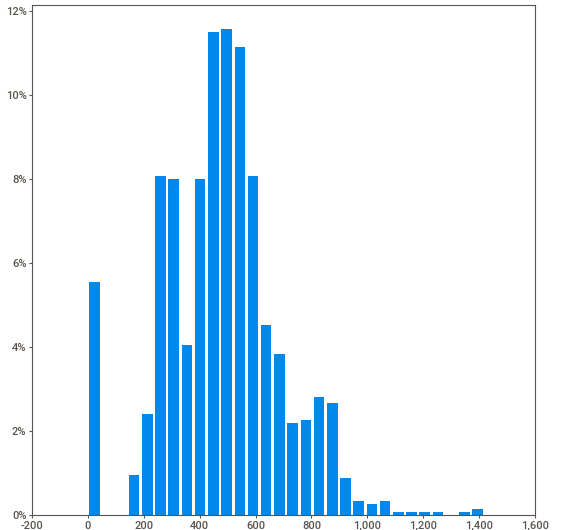
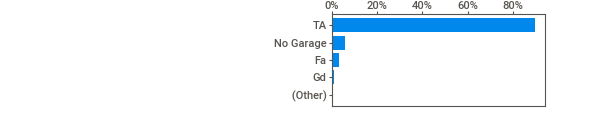
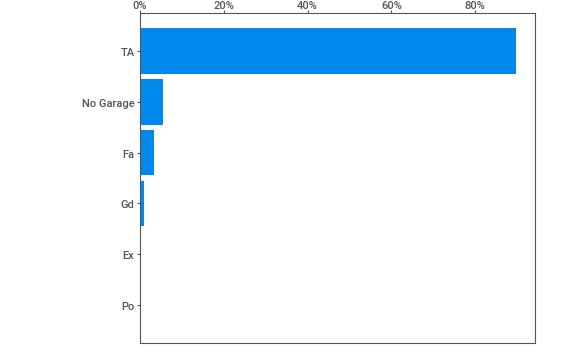
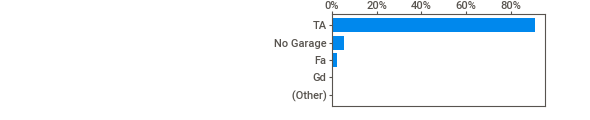
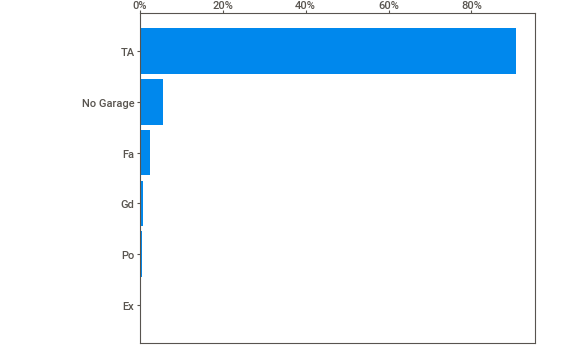
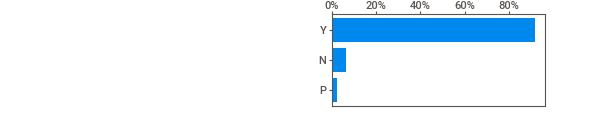
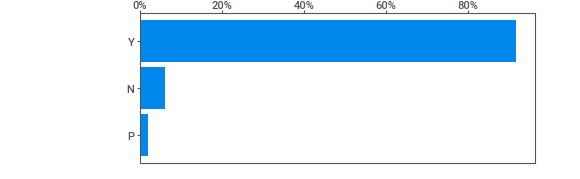
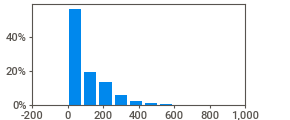
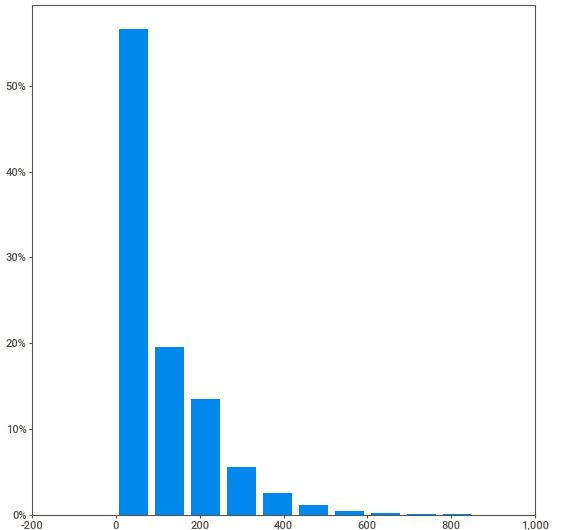
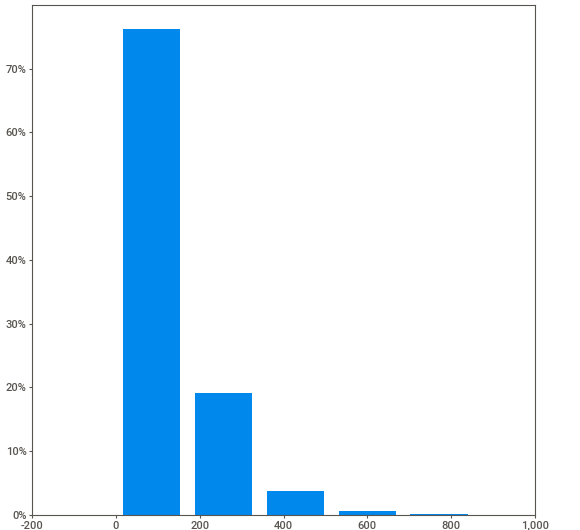
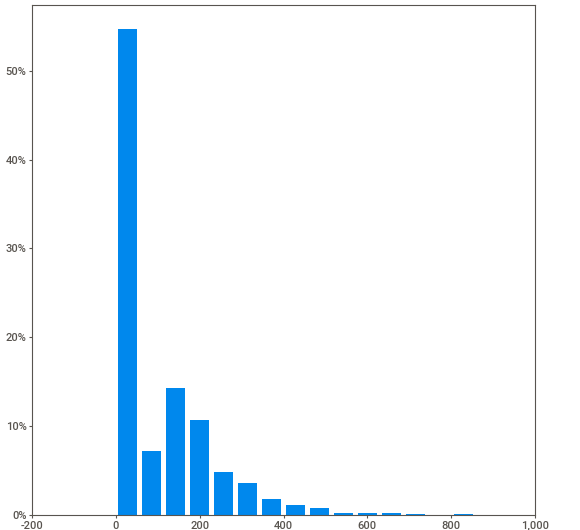
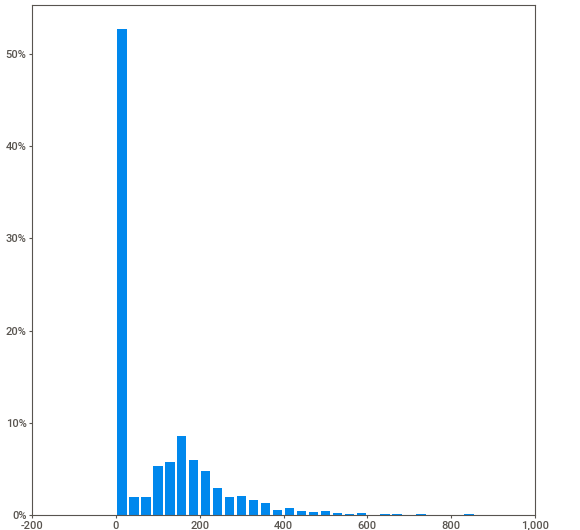
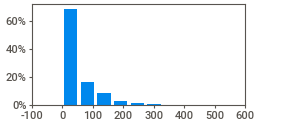
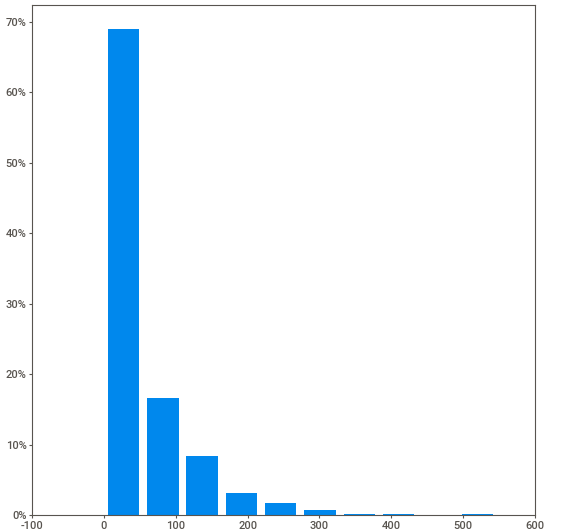
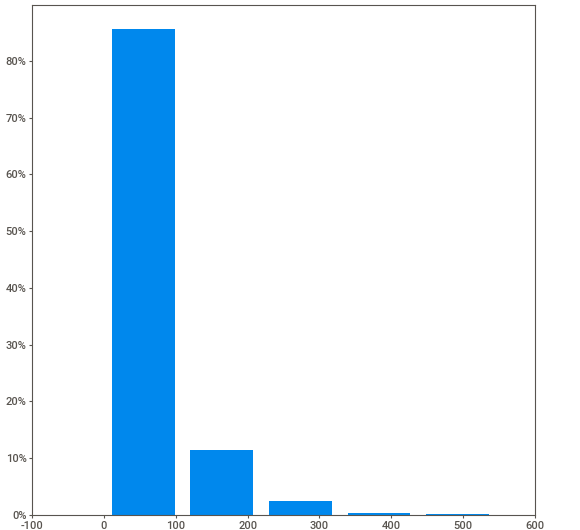
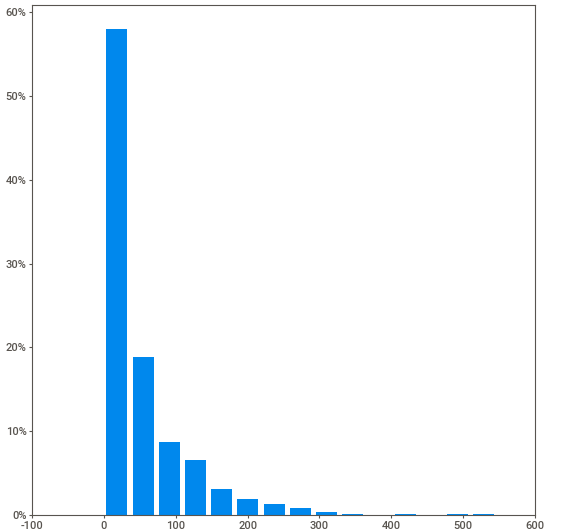
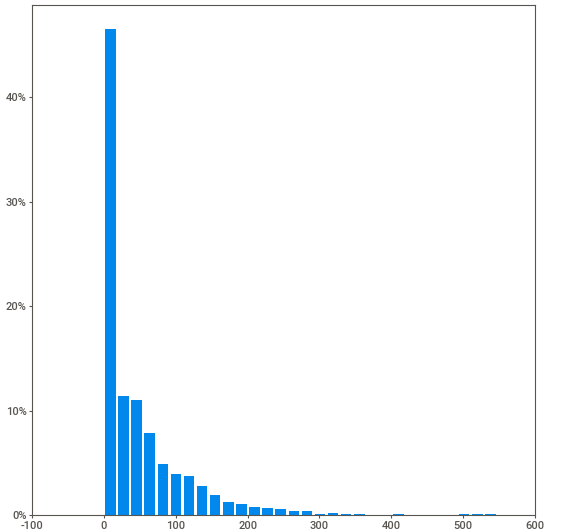
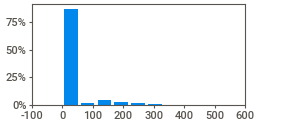
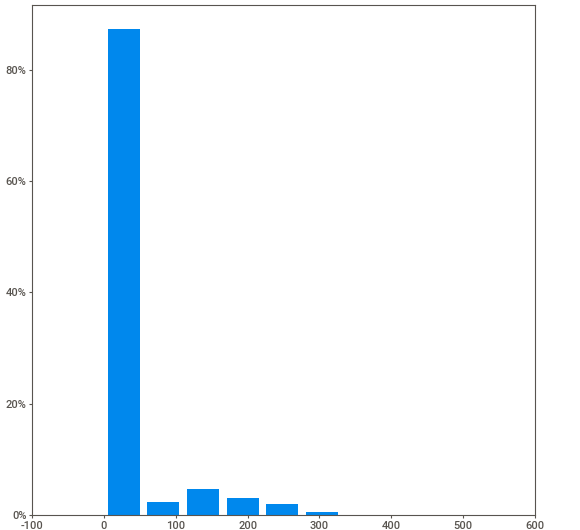
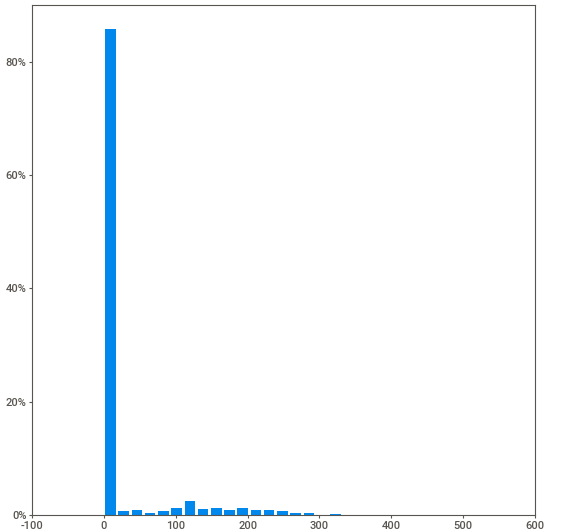
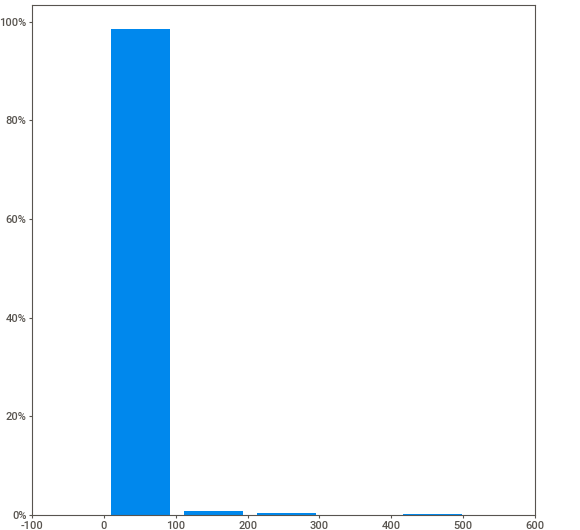
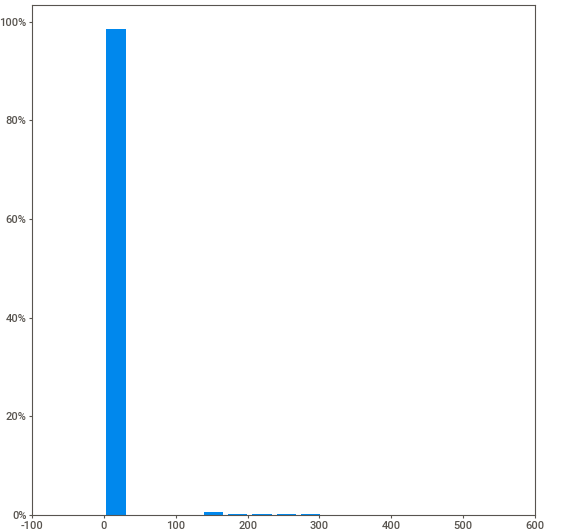
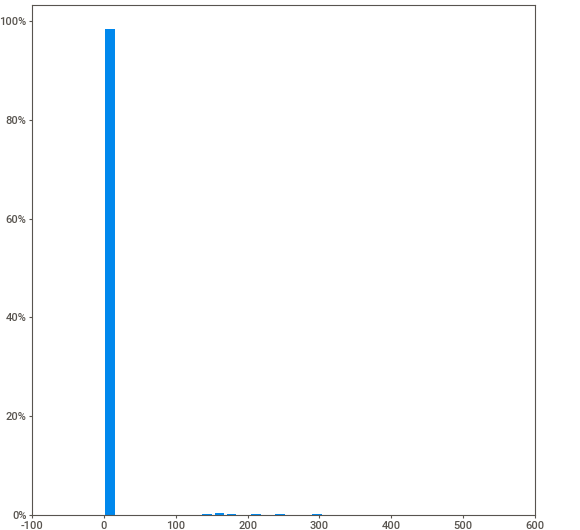
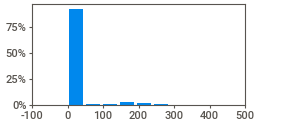
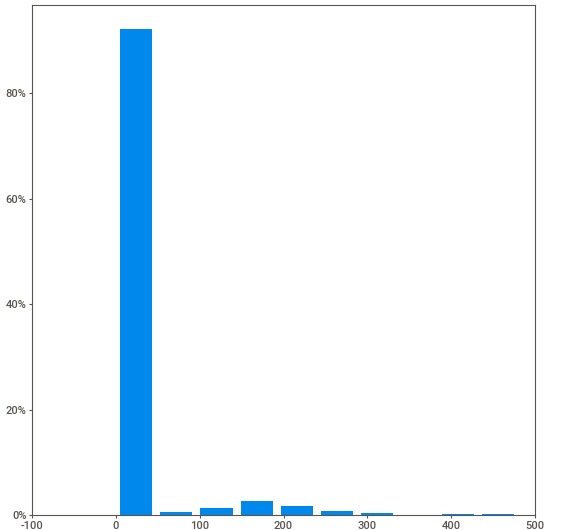
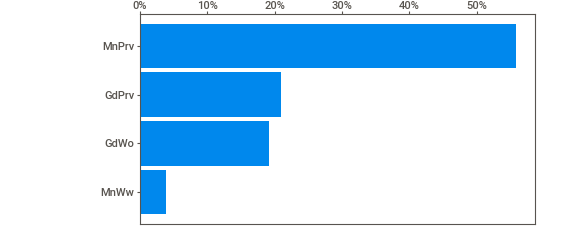
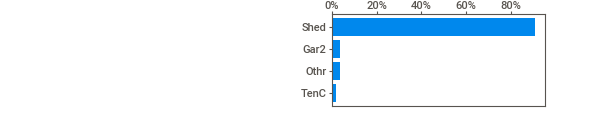
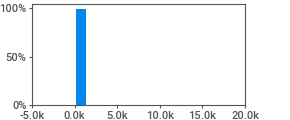
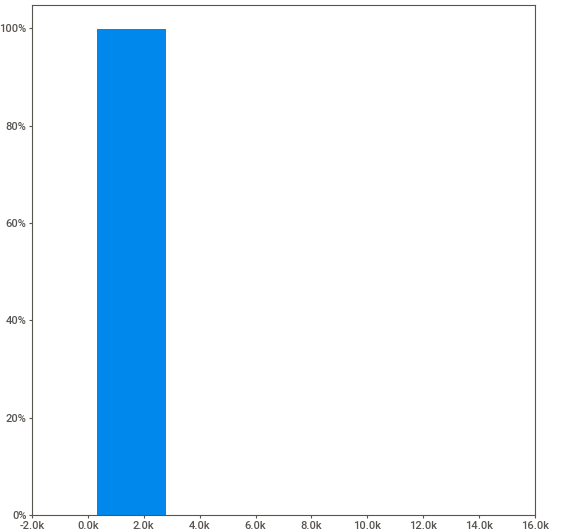
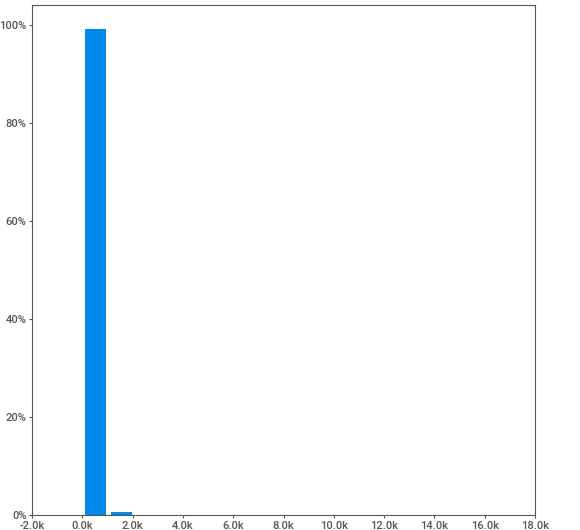
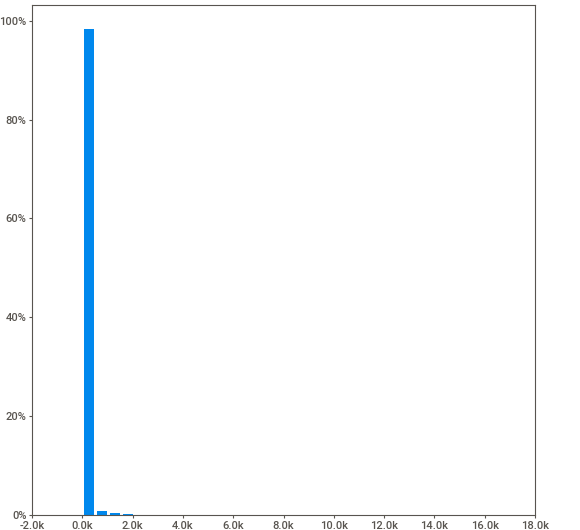
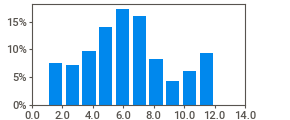
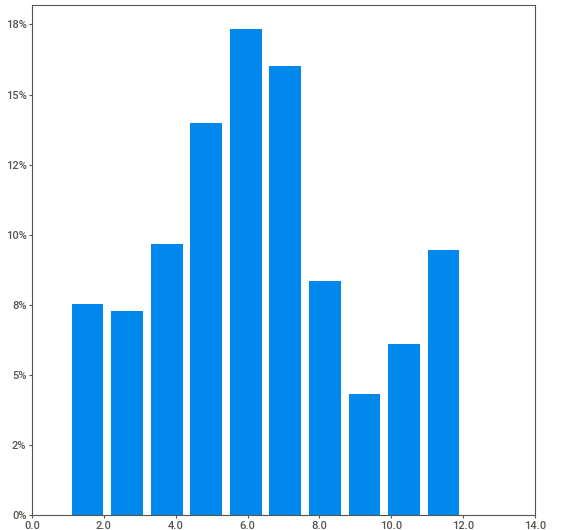
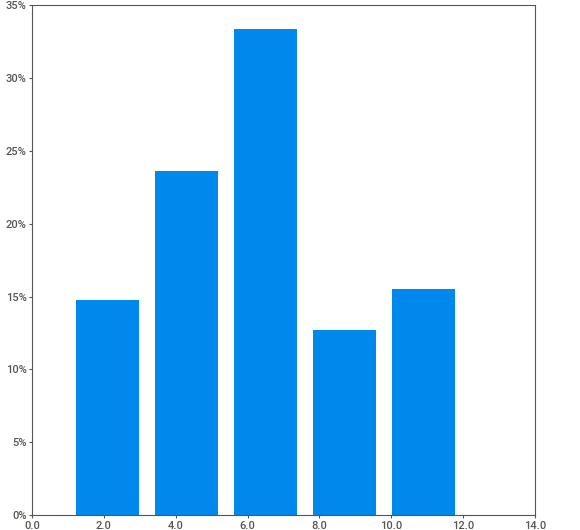
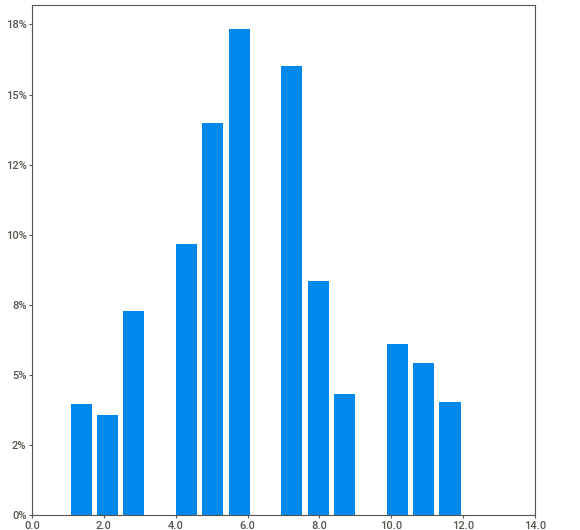
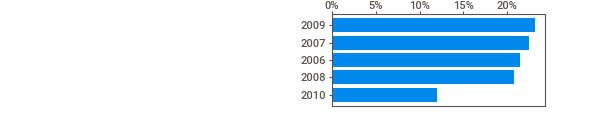
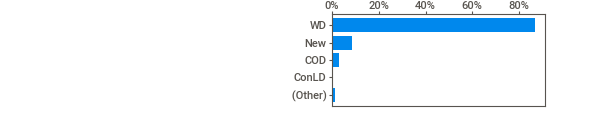
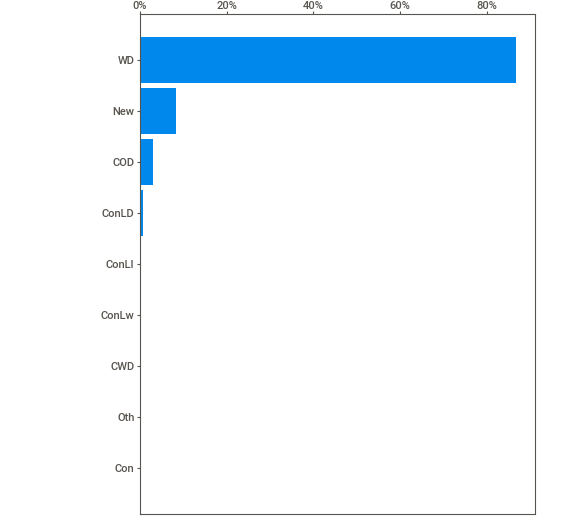
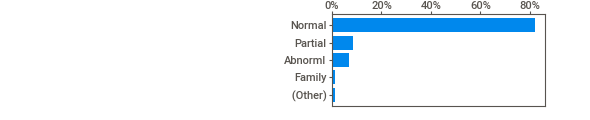
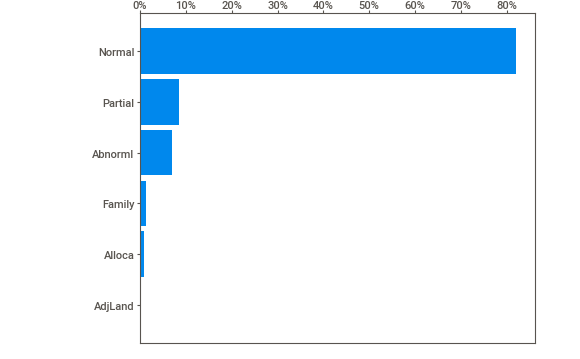
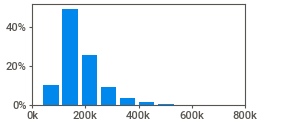
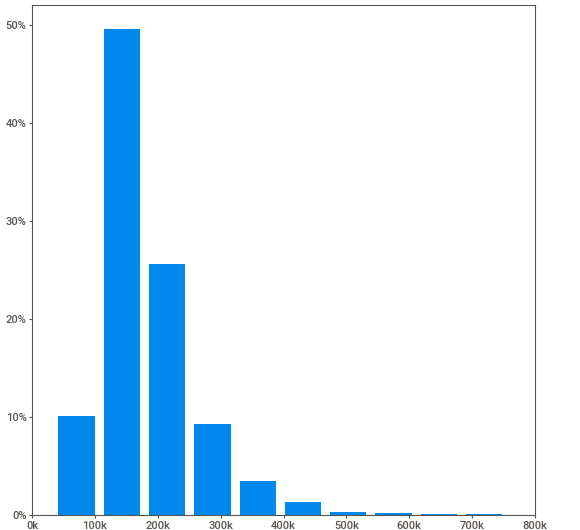
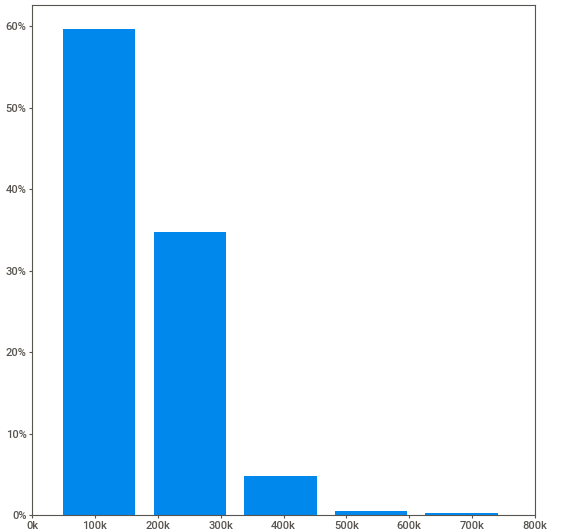
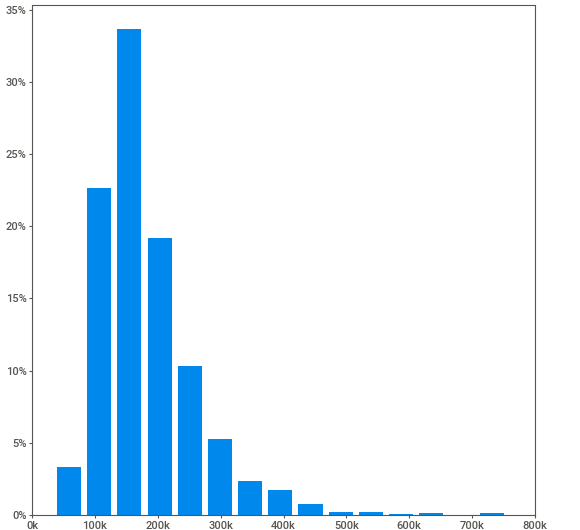
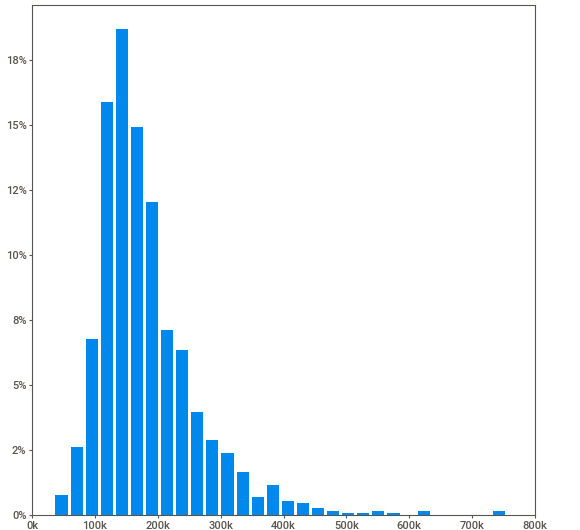
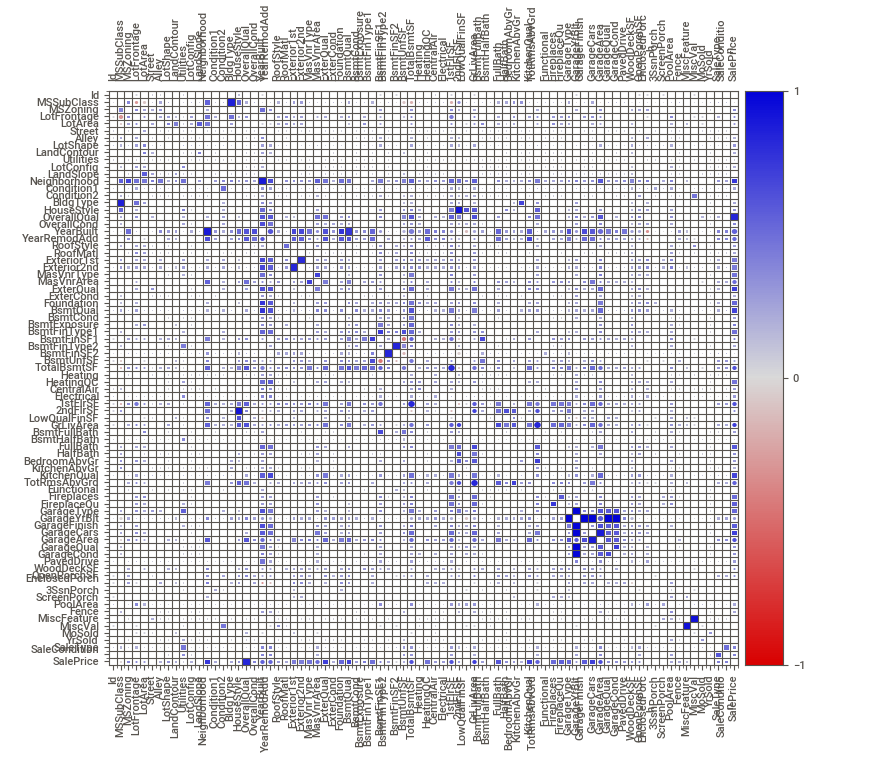
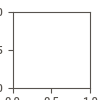

In [69]:
report.show_notebook()

#  Bi-Variate & Multi-Variate Analysis

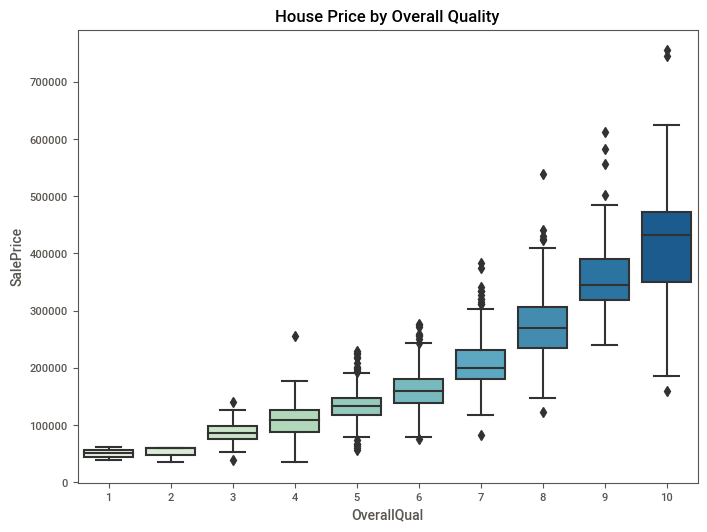

In [70]:
#Bi-variate Analysis for Sales price with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='GnBu')
title = plt.title('House Price by Overall Quality')

From the boxplot we get to know that Better the House quality is more the price of the house.and There are mosre houses

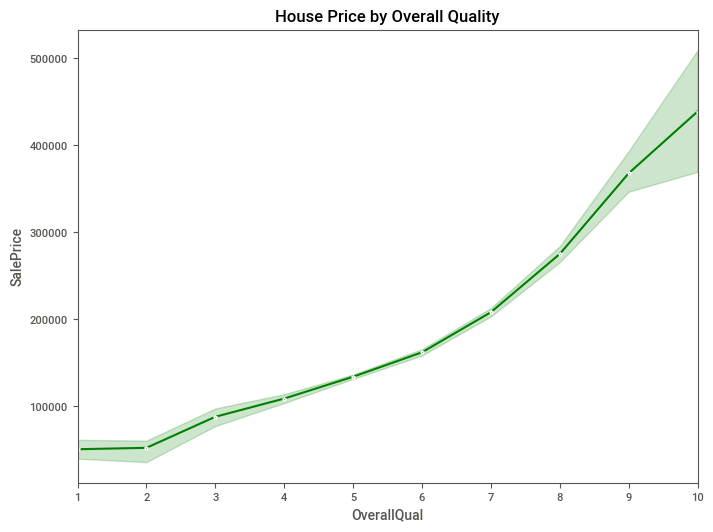

In [71]:
#Bi-variate Analysis for Sales price with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.lineplot(x='OverallQual', y='SalePrice', data=df,color='green',marker='*')
plt.margins(x=0)
title = plt.title('House Price by Overall Quality')

#  Overall Condition with Overall Quality

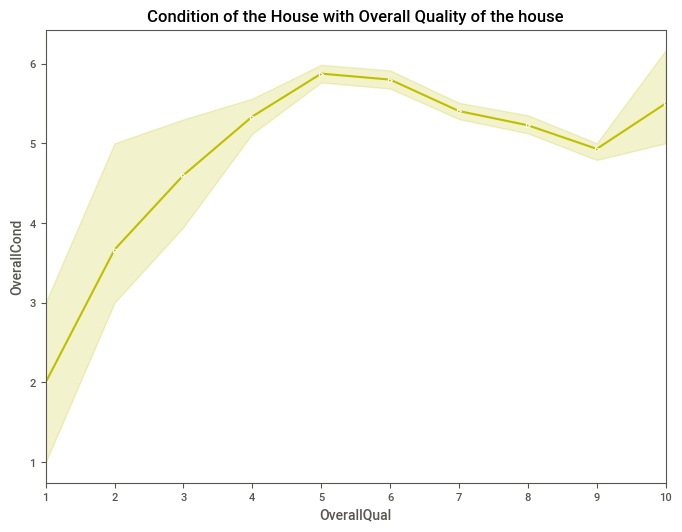

In [72]:
#Bi-variate Analysis for Overall Condition with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.lineplot(x='OverallQual', y='OverallCond', data=df,color='y',marker=">")
title = plt.title('Condition of the House with Overall Quality of the house')
plt.margins(x=0)
plt.show()

In [73]:
#crosstab for Overall Condition of the house with Quality of the House
pd.crosstab(df['OverallCond'],df['OverallQual'],margins=True)

OverallQual  1  2   3    4    5    6    7    8   9  10   All
OverallCond                                                 
1            1  0   0    0    0    0    0    0   0   0     1
2            0  0   2    1    1    0    0    0   1   0     5
3            1  2   3    5    7    6    1    0   0   0    25
4            0  0   6   20   21    6    3    1   0   0    57
5            0  1   2   44  142  180  247  148  42  15   821
6            0  0   5   24  104   83   28    7   0   1   252
7            0  0   1   19   89   66   23    7   0   0   205
8            0  0   1    2   29   30    8    2   0   0    72
9            0  0   0    1    4    3    9    3   0   2    22
All          2  3  20  116  397  374  319  168  43  18  1460

In [74]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

# The Electrical connection in types of  Houses with AirConditioning

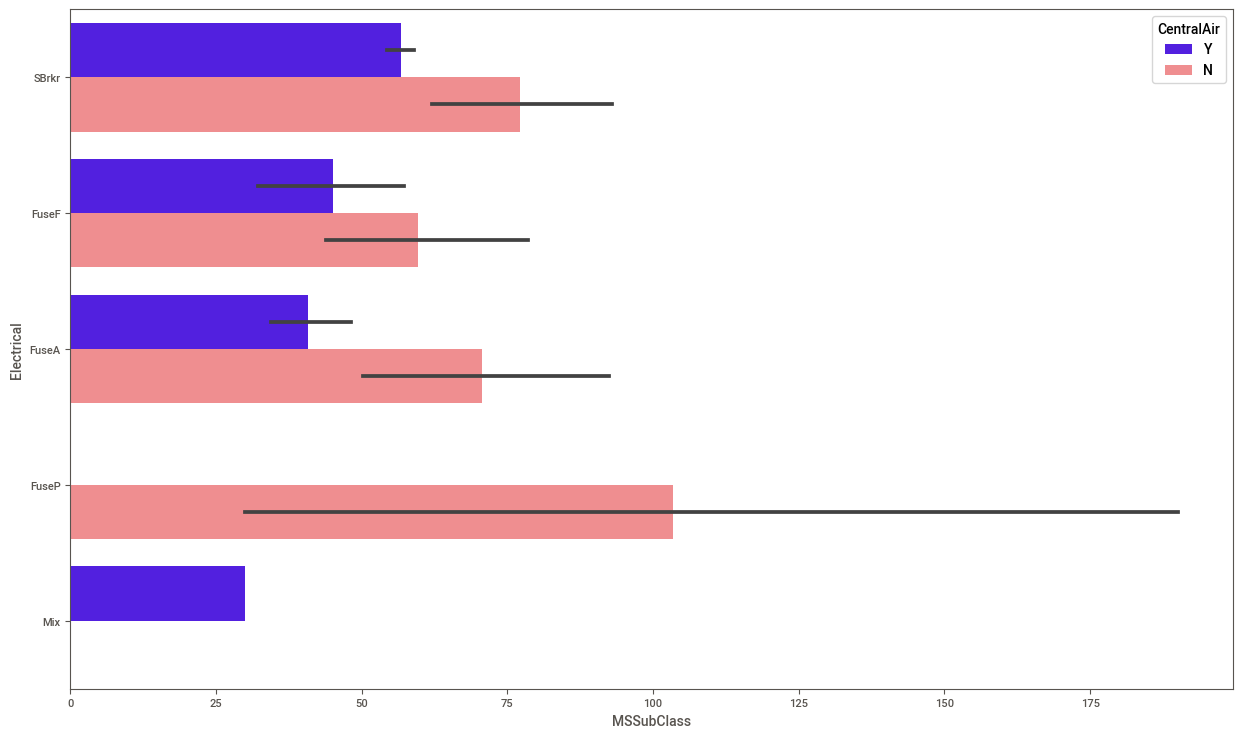

In [75]:
#PLotting BAR PLOT for Electrical connection with AirConditioning
plt.figure(figsize=(15,9))
splot=sns.barplot(y='Electrical',x='MSSubClass',hue='CentralAir',palette='gnuplot2',data=df)

plt.show()

In [76]:
#Getting all the numerical feature
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [77]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [78]:
#taking the only the Numerical Varibles from the dataset
num_data=df.select_dtypes(np.number)
num_data.head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [79]:
#melting the Numerical Column
col=num_data.columns
mel_num=pd.melt(df,value_vars=col)
mel_num.head()

variable  value
0       Id    1.0
1       Id    2.0
2       Id    3.0
3       Id    4.0
4       Id    5.0

In [80]:
#length of the numerical columns
len(col)

38

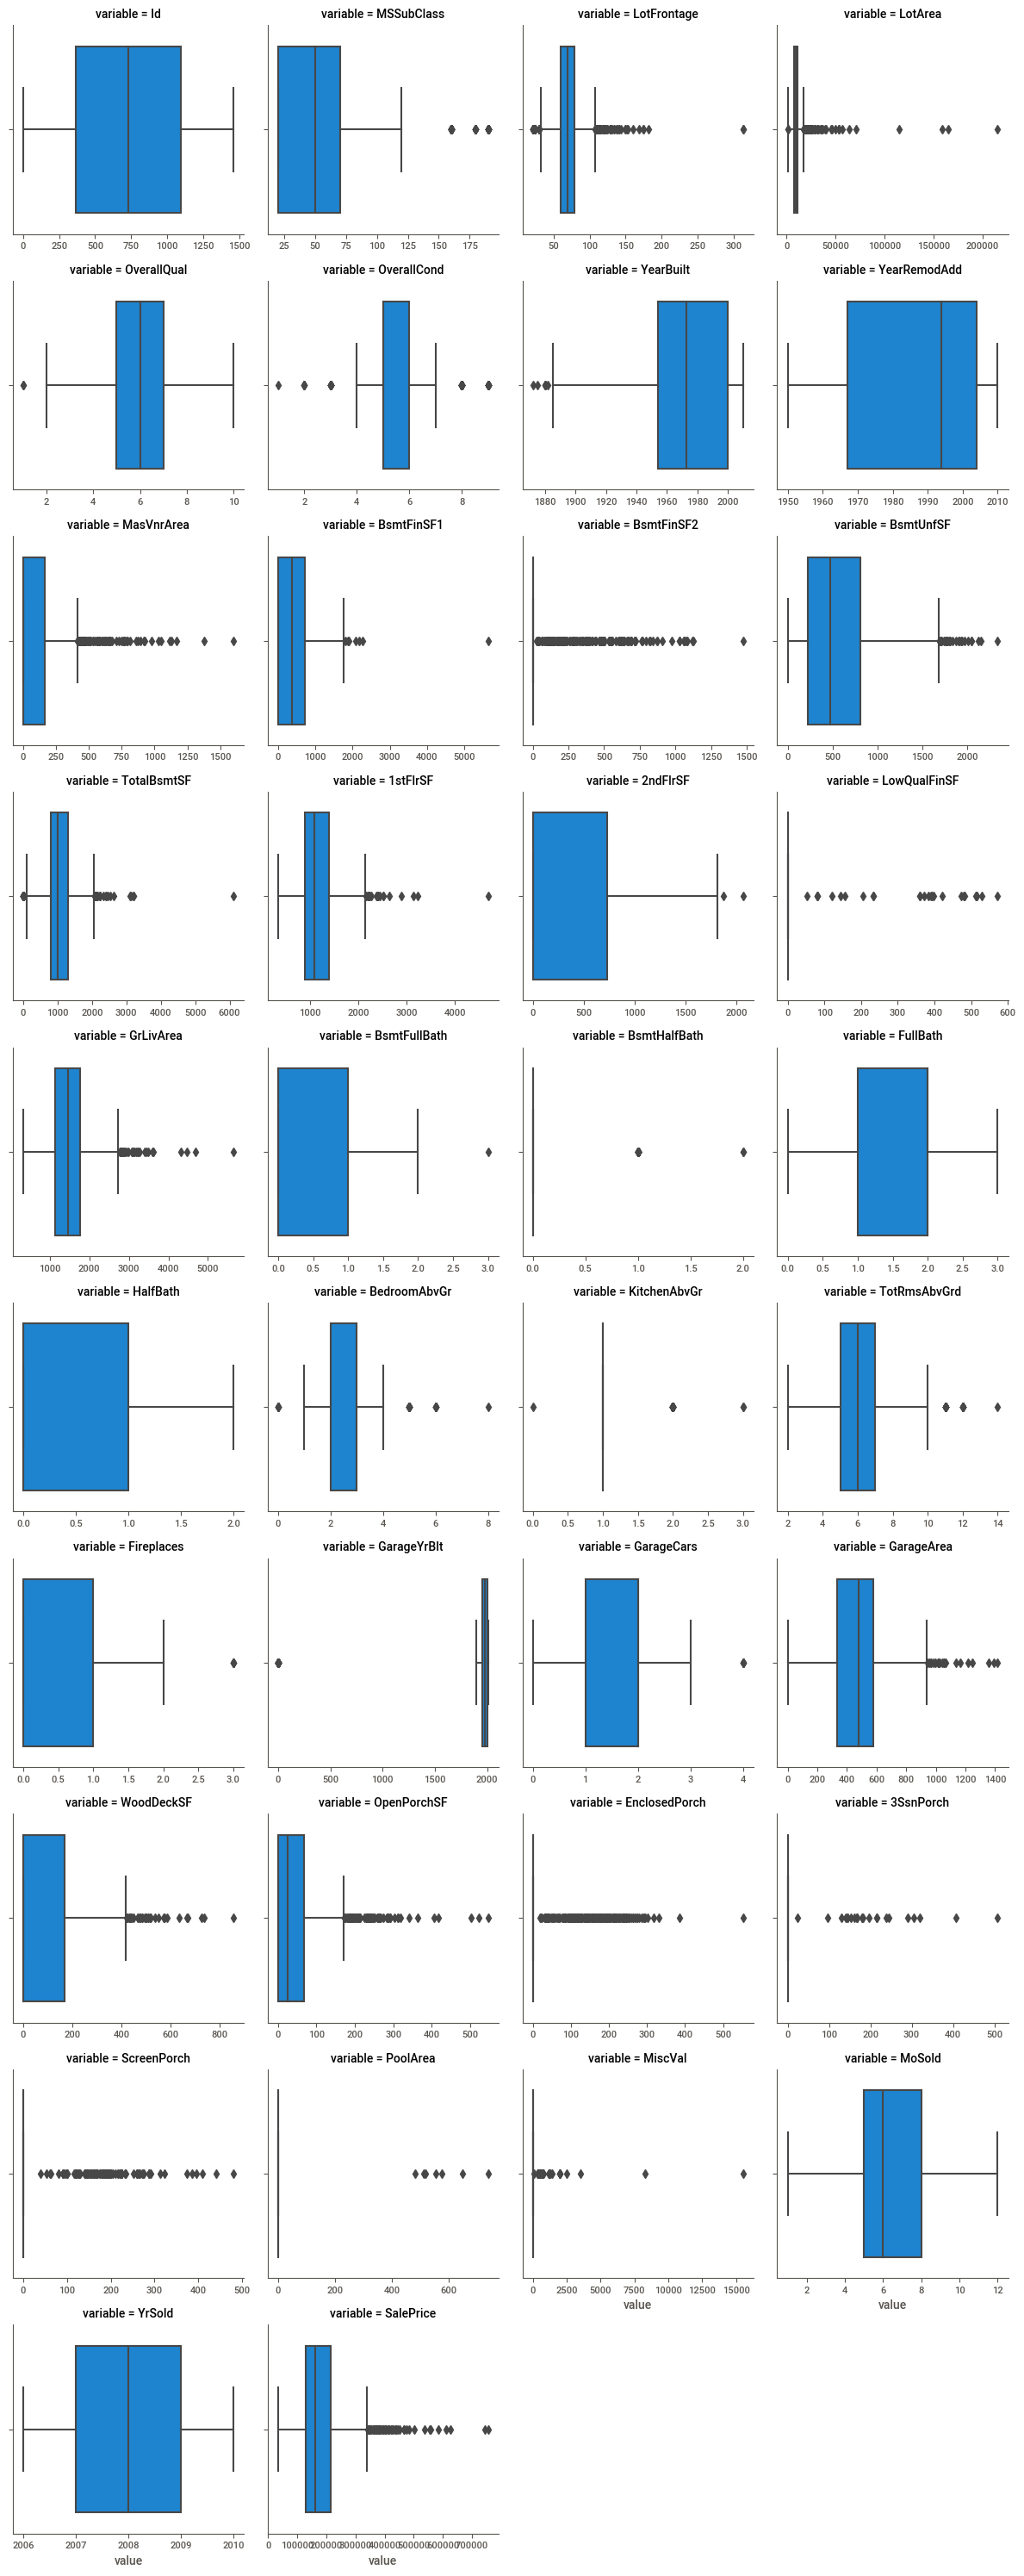

In [81]:
# Plotting Box plot for all the numerical values  in the dataete
grid=sns.FacetGrid(mel_num,col='variable',col_wrap=4,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')

In [82]:
box=df[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']]

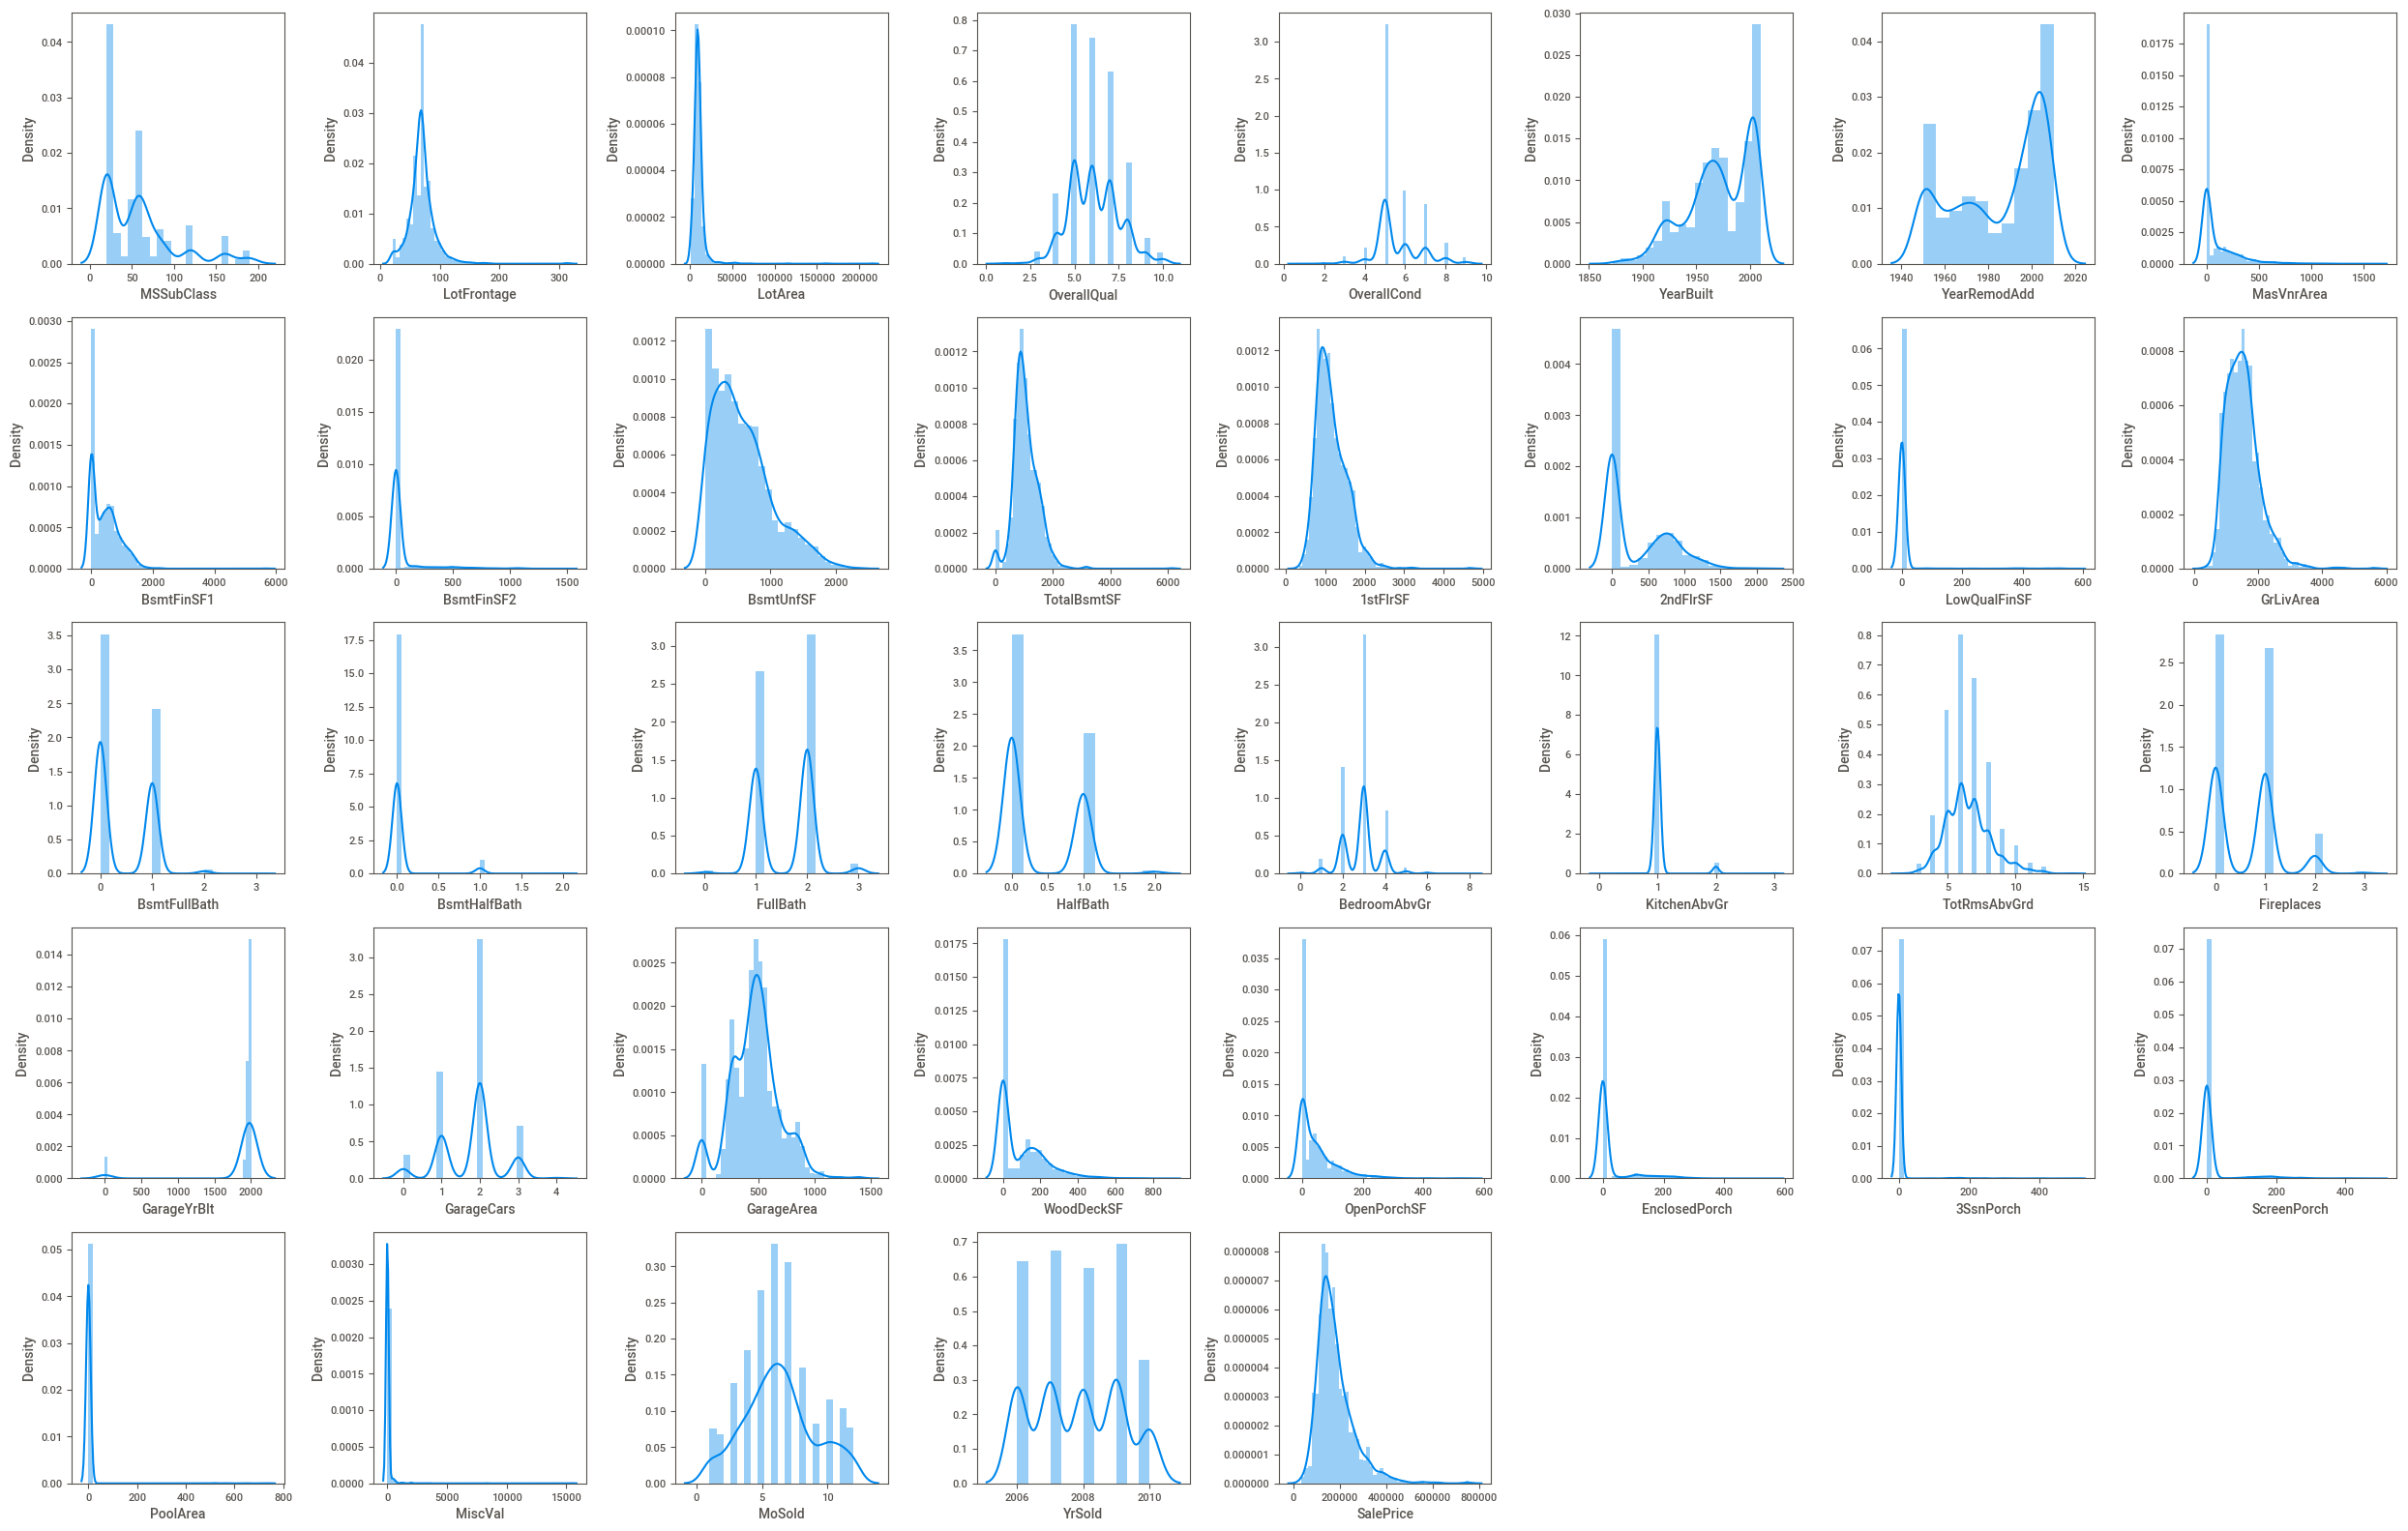

In [83]:
#plotting distribution plot for the columns
plt.figure(figsize=(25,25),facecolor='white')#canvas size

plotnum=1 #counter

for c in box:#columns form dataFrame
    if(plotnum<50):#checking whether counter less than 9
        a=plt.subplot(8,8,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   
plt.show()

In [84]:
#including only numerical values
dtype_objects = list(columns for columns in df.select_dtypes(exclude=object).columns)

In [85]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [86]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [87]:
#Plotting count plot for all the discrete features in the dataset
plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in discrete_feature:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=df[c],y=df.SalePrice,palette='Set2')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show()

In [88]:
#plotting Heatmap 
plt.figure(figsize=(20,20))
plt.title('Correlation between the Features',fontsize=20)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Handling the Skewness

In [112]:
# finding skewed features

from scipy.stats import skew

numerical_feats = df.dtypes[df.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = df[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(10)

skew
Utilities     38.170678
PoolArea      14.343629
Condition2    13.158307
Heating        9.844972
RoofMatl       8.101068
3SsnPorch      7.687605
LowQualFinSF   7.394453
MiscVal        5.090141
LandSlope      4.808735
KitchenAbvGr   3.942194

In [113]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
df[skewed_features] = np.log1p(df[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 81 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


# Label Encoding

In [114]:
#taking all the categorical feature
dfobj = df.select_dtypes(include = "object").columns
print (dfobj)

Index([], dtype='object')


In [115]:
#taking all the categorical feature
dfobjtt = test_df.select_dtypes(include = "object").columns
print (dfobj)

Index([], dtype='object')


In [116]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in dfobj:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [117]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in dfobjtt:
    test_df[feat] = le.fit_transform(test_df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   float64
 18  OverallC

# TrainTest Split
# &
# Pre-Processing

In [118]:
#Splitting data
# x variable containing all the features
x_train=df.drop(['SalePrice'],axis=1)
# y varaible containg only the target variable
y_train=df['SalePrice']

In [119]:
#using standard sclaer to scale all the datas
#by using standard scaler we can bring all the data to equal unit
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [120]:
#using standard sclaer to scale all the datas
#by using standard scaler we can bring all the data to equal unit
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(test_df)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=0)

x_train

y_train

# Model Building

## Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
lr=LinearRegression()

In [138]:
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
x_train_predict=lr.predict(x_train)

In [140]:
x_test_predict=lr.predict(x_test)

In [141]:
print('Linear Regression Training Score %.2f%% '%lr.score(x_train,y_train))

Linear Regression Training Score 0.90% 


print('Linear Regression Testing Score %.2f%% '%lr.score(x_test,y_test))

In [142]:
x_test_predict

array([1.07827221, 1.08047948, 1.08372782, ..., 1.07393921, 1.08388715,
       1.08798373])

### Evaluation Metric

In [128]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## R2-Score

print(r2_score(y_test,x_test_predict))

print(r2_score(y_test,x_test_predict))

print(r2_score(x_test,x_train_predict))

### Root Mean Squared Error

In [102]:
RMSE_train=math.sqrt(mean_squared_error(y_train,x_train_predict))
print(RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,x_test_predict))
print(RMSE_test)

0.02088295191858392
0.030577665793625166


# Decision Tree 

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
DTR=DecisionTreeRegressor()

In [105]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [106]:
DTRpred=DTR.predict(x_test)

In [107]:
DTRpred

array([3.53250228, 3.52732638, 3.50503183, 3.60007704, 3.42717651,
       3.42717651, 3.61646273, 3.48406921, 3.80894007, 3.5670929 ,
       3.56519099, 3.52260367, 3.60007704, 3.51558551, 3.47539591,
       3.53491831, 3.60201225, 3.43035675, 3.52186536, 3.62229662,
       3.53998307, 3.52431407, 3.44734892, 3.55635884, 3.57037087,
       3.60963329, 3.55635884, 3.43244485, 3.67190816, 3.50228848,
       3.49879629, 3.57674289, 3.52431407, 3.64040388, 3.71729322,
       3.57175657, 3.64283893, 3.50672437, 3.59749612, 3.69268639,
       3.59373141, 3.52552538, 3.57754507, 3.62023614, 3.64283893,
       3.46863294, 3.50672437, 3.50672437, 3.55635884, 3.47540885,
       3.71177321, 3.52792252, 3.55484117, 3.47700581, 3.62727417,
       3.47700581, 3.50435011, 3.59169864, 3.47539591, 3.50228848,
       3.51938105, 3.51131073, 3.51300751, 3.51938105, 3.55836156,
       3.57975365, 3.50906614, 3.60421072, 3.48406921, 3.56326756,
       3.5670929 , 3.48483639, 3.40310984, 3.56326756, 3.42824

In [108]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

In [109]:
from sklearn.metrics import r2_score

In [110]:
print(r2_score(y_test,DTRpred))

0.7710373515104028


# Decision Tree Results

In [111]:
print('Decision Tree Regressor Training Score %.2f%% '%(DTR.score(x_train,y_train)*100))

Decision Tree Regressor Training Score 100.00% 


In [112]:
print('Decision Tree Regressor Testing Score %.2f%% '%(DTR.score(x_test,y_test)*100))

Decision Tree Regressor Testing Score 77.10% 


# Decision Tree Hyper Parameter Tuning

In [113]:
DTR2=DecisionTreeRegressor(max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')

In [114]:
DTR2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=3, splitter='random')

In [115]:
DTRpred2=DTR2.predict(x_train)

In [116]:
DTRpred22=DTR2.predict(x_test)

In [117]:
DTRpred2

array([3.47171304, 3.54042987, 3.52430974, ..., 3.47018308, 3.57686372,
       3.5984153 ])

In [118]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

# Decision Tree Hyper Parameter Tuning Results

In [119]:
print('Decision Tree after tuning Training Score %.2f%% '%(DTR2.score(x_train,y_train)*100))

Decision Tree after tuning Training Score 96.55% 


In [120]:
print('Decision Tree after tuning Testing Score %.2f%% '%(DTR2.score(x_test,y_test)*100))

Decision Tree after tuning Testing Score 67.51% 


### Evaluation Metric

#### Root Mean Squared Error

In [121]:
RMSE_train=math.sqrt(mean_squared_error(y_train,DTRpred2))
print(RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,DTRpred22))
print(RMSE_test)

0.01308018718020199
0.038262278083999596


# Random Forest 

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [124]:
prediction1=rfr.predict(x_train)

In [125]:
prediction2=rfr.predict(x_test)

In [126]:
prediction1

array([3.4875095 , 3.54867324, 3.50643578, ..., 3.49535739, 3.59404919,
       3.59885552])

In [127]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

# Random Forest Results

In [128]:
print('Random Forest Training Score %.2f%% '%(rfr.score(x_train,y_train)*100))

Random Forest Training Score 98.12% 


In [129]:
print('Random Forest Testing Score %.2f%% '%(rfr.score(x_test,y_test)*100))

Random Forest Testing Score 88.75% 


In [130]:
r2_score(y_test,prediction2)

0.8874904398575337

# Random Forest Hyper Parameter Tuning

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
grid={'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
      'max_features':['auto','sqrt','log2'],
      'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
      'min_samples_split':[2,5,10,15,100],
      'min_samples_leaf':[1,2,5,10]}

In [133]:
hyper_tuning=RandomizedSearchCV(estimator=rfr,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=5,random_state=2)

In [134]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.2s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.2s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.002 total time=   1.3s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.0s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.1s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=-0.001 total time=   8.4s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=7

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=5)

In [135]:
hyper_tuning.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [136]:
rfr2=RandomForestRegressor(n_estimators=700,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=30)

In [137]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='auto', n_estimators=700)

In [138]:
prediction22=rfr2.predict(x_train)

In [139]:
prediction2=rfr2.predict(x_test)

# Random Forest Hyper Parameter Tuning Results

In [140]:
print('Random Forest after tuning Training Score %.2f%% '%(rfr2.score(x_train,y_train)*100))

Random Forest after tuning Training Score 98.21% 


In [141]:
print('Random Forest after tuning Testing Score %.2f%% '%(rfr2.score(x_test,y_test)*100))

Random Forest after tuning Testing Score 88.72% 


### Root Mean Squared Error

In [142]:
import math

In [143]:
RMSE_train=math.sqrt(mean_squared_error(y_train,prediction22))
print('RMSE Training Score for Random Forest after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,prediction2))
print('RMSE Test Score for Random Forest after tuning',RMSE_test)

RMSE Training Score for Random Forest after tuning 0.009432196304885036
RMSE Test Score for Random Forest after tuning 0.022545433401689546


# Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [145]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [146]:
gbrpred=gbr.predict(x_test)

In [147]:
gbrpred

array([3.57517003, 3.53230768, 3.47761595, 3.59633741, 3.44270385,
       3.43477133, 3.62654819, 3.49997349, 3.72937081, 3.53265289,
       3.57300497, 3.52326138, 3.60711828, 3.50575055, 3.49107623,
       3.52183424, 3.60757373, 3.48676267, 3.51774939, 3.56400824,
       3.48515131, 3.52039022, 3.46624706, 3.54522454, 3.56919025,
       3.57254612, 3.54977362, 3.40499244, 3.67476274, 3.48171439,
       3.50837669, 3.58578726, 3.52401785, 3.64571301, 3.64712155,
       3.57298448, 3.64337891, 3.48172107, 3.60611535, 3.67333971,
       3.59544918, 3.49183291, 3.57061328, 3.65223517, 3.67807856,
       3.51055346, 3.50886446, 3.50997646, 3.55041172, 3.45153618,
       3.70947255, 3.52592783, 3.54497568, 3.4184253 , 3.60882282,
       3.46836087, 3.49322413, 3.61469998, 3.51411455, 3.46598707,
       3.51324542, 3.5097566 , 3.51772715, 3.55098059, 3.58386632,
       3.54123648, 3.50640216, 3.59105794, 3.491596  , 3.57951013,
       3.5625043 , 3.49033293, 3.41136073, 3.60610109, 3.43258

In [148]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

In [149]:
print(r2_score(y_test,gbrpred))

0.8921326481849532


# Gradient Boosting Results

In [150]:
print('Gradient Boosting Training Score %.2f%% '%(gbr.score(x_train,y_train)*100))

Gradient Boosting Training Score 96.42% 


In [151]:
print('Gradient Boosting Testing Score %.2f%% '%(gbr.score(x_test,y_test)*100))

Gradient Boosting Testing Score 89.21% 


# Gradient Boosting Hyper Parameter Tuning 

In [152]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [153]:
GBR1=GradientBoostingRegressor()
#search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
#search=GridSearchCV(estimator=GBR1,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
hyper_tuning=RandomizedSearchCV(estimator=GBR1,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=5,random_state=2)

In [154]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.000 total time=   1.6s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.4s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.001 total time=   1.5s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.000 total time=   1.4s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-0.000 total time=   3.0s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=-0.001 total time=   3.9s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=7

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=5)

In [155]:
hyper_tuning.best_params_

{'n_estimators': 800,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20}

In [156]:
GBR2=GradientBoostingRegressor(n_estimators=700,min_samples_split=100,min_samples_leaf=2,max_features='sqrt',max_depth=20)
score=np.mean(cross_val_score(GBR2,x,y,scoring='neg_mean_squared_error',cv=None,n_jobs=1))

In [157]:
score

-0.0004952153426305049

In [158]:
GBR2.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=100, n_estimators=700)

In [159]:
predictGBR2=GBR2.predict(x_train)

In [160]:
predictGBR22=GBR2.predict(x_test)

# Gradient Boosting Hyper Parameter Tuning Results

In [161]:
print('Gradient Boosting Training Score %.2f%% '%(GBR2.score(x_train,y_train)*100))

Gradient Boosting Training Score 100.00% 


In [162]:
print('Gradient Boosting Testing Score %.2f%% '%(GBR2.score(x_test,y_test)*100))

Gradient Boosting Testing Score 87.50% 


### Root Mean Squared Error

In [163]:
RMSE_train=math.sqrt(mean_squared_error(y_train,predictGBR2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,predictGBR22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.0002470867200463513
RMSE Test Score for Gradient Boosting after tuning 0.023735080516236785


# Xtreme Gradient Boosting 

In [134]:
from xgboost import XGBRegressor

In [145]:
xgb_r = XGBRegressor()

#xgb_r= XGBRegressor() ## object creation
xgb_r.fit(x_train,y_train)# fitting the data
xgbrpred22=xgb_r.predict(x_test)#predicting the price
xgbrpred2=xgb_r.predict(x_train)

# Xtreme Gradient Boosting Results

In [146]:
print('Gradient Boosting Training Score %.2f%% '%(xgb_r.score(x_train,y_train)*100))

Gradient Boosting Training Score 98.94% 


In [147]:
print('Gradient Boosting Testing Score %.2f%% '%(xgb_r.score(x_test,y_test)*100))

NameError: name 'y_test' is not defined

In [148]:
r2_score(y_test,xgbrpred22)#R2 score

NameError: name 'y_test' is not defined

In [149]:
r2_score(y_test,predictGBR22)

NameError: name 'y_test' is not defined

In [150]:
predictGBR2=xgb_r.predict(x_train)

In [152]:
predictGBR22=xgb_r.predict(x_test)

In [153]:
predictGBR22

array([1.0782166, 1.0825665, 1.0848529, ..., 1.0735742, 1.0831071,
       1.0881534], dtype=float32)

### Root Mean Squared Error

In [172]:
RMSE_train=math.sqrt(mean_squared_error(y_train,xgbrpred2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,xgbrpred22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.0010651141726324123
RMSE Test Score for Gradient Boosting after tuning 0.024180804637554745


# Xtreme Gradient Boosting Hyper Parameter Tuning

In [155]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree

params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBRegressor(random_state=42)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)
                              
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

Best paramters: {'subsample': 0.7, 'n_estimators': 1600, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [156]:
XGB2=XGBRegressor(subsample=1,n_estimators=600, max_depth= 3,learning_rate= 0.1, gamma=0,colsample_bytree= 0.5)

In [157]:
XGB2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [171]:
XGBpred22=XGB2.predict(x_test)
XGBpred2=XGB2.predict(x_train)

In [173]:
len(x_test)

1146

In [170]:
len(XGBpred22)

1146

y_test

# Xtreme Gradient Boosting after Tuning Results

In [160]:
(print('Extreme Gradient Boosting after tuning Training Score %.2f%% '%(XGB2.score(x_train,y_train)*100)))

Extreme Gradient Boosting after tuning Training Score 97.66% 


In [180]:
(print('Extreme Gradient Boosting after tuning Testing Score %.2f%% '%(XGB2.score(x_test,y_test)*100)))

Extreme Gradient Boosting after tuning Testing Score 89.84% 


In [181]:
r2_score(y_test,XGBpred22)#R2 score

0.8983878919148638

### Root Mean Squared Error

In [182]:
RMSE_train=math.sqrt(mean_squared_error(y_train,XGBpred2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,XGBpred22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.005796195535583368
RMSE Test Score for Gradient Boosting after tuning 0.02139804277604032


In [161]:
import pickle
filename='Finale_model.pkl'
pickle.dump(XGB2,open(filename,'wb'))

# XGB |Tuning*2

In [183]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [184]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgb_r,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [185]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [186]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [187]:
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 0.25}

In [188]:
XGB3=XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=4,
                               monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [189]:
XGB3.fit(x_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [203]:
XGBpred33=XGB3.predict(x_test)

In [204]:
XGBpred33

array([3.5993464, 3.529031 , 3.4890628, 3.6058655, 3.445582 , 3.434304 ,
       3.6168044, 3.5028644, 3.763264 , 3.5250354, 3.5830355, 3.5217187,
       3.5987318, 3.503366 , 3.4950495, 3.5215397, 3.6003075, 3.4862354,
       3.5190847, 3.5592685, 3.4709918, 3.5284476, 3.4610815, 3.5393379,
       3.5677357, 3.578528 , 3.551234 , 3.4054997, 3.673214 , 3.484432 ,
       3.5002782, 3.5827765, 3.5282528, 3.6535695, 3.673255 , 3.5751805,
       3.6444335, 3.495305 , 3.603428 , 3.6734927, 3.6001413, 3.492684 ,
       3.5717015, 3.6608577, 3.6917386, 3.5040011, 3.5076544, 3.5131261,
       3.5535007, 3.4496906, 3.7089028, 3.5254948, 3.5408652, 3.4372466,
       3.617167 , 3.466408 , 3.4876692, 3.6074047, 3.5096622, 3.456282 ,
       3.5109997, 3.5065129, 3.5121675, 3.5542738, 3.590073 , 3.5324128,
       3.5138454, 3.6033325, 3.5032902, 3.5800254, 3.5644538, 3.4918637,
       3.4006805, 3.608243 , 3.4062636, 3.625886 , 3.5056045, 3.4647403,
       3.6444943, 3.5357308, 3.490555 , 3.507642 , 

# Xtreme Gradient Boosting after Tuning *2 Results

In [190]:
(print('Extreme Gradient Boosting after tuning Training Score %.2f%% '%(XGB3.score(x_train,y_train)*100)))

Extreme Gradient Boosting after tuning Training Score 97.02% 


In [191]:
(print('Extreme Gradient Boosting after tuning Testing Score %.2f%% '%(XGB3.score(x_test,y_test)*100)))

Extreme Gradient Boosting after tuning Testing Score 88.58% 


### Root Mean Squared Error

In [192]:
XGBpred3=XGB3.predict(x_train)

In [193]:
RMSE_train=math.sqrt(mean_squared_error(y_train,XGBpred3))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,XGBpred33))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.012168279223903188
RMSE Test Score for Gradient Boosting after tuning 0.022684775250245662


In [194]:
! pip install lightgbm

# Light Gradient Boosted Machine

In [195]:
# light gradient boosting
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

## Light Gradient Boosted Machine Result 

In [196]:
(print('Light Gradient Boosting Training Score %.2f%% '%(model_lgb.score(x_train,y_train)*100)))

Light Gradient Boosting Training Score 97.08% 


In [197]:
(print('Light Gradient Boosting Testing Score %.2f%% '%(model_lgb.score(x_test,y_test)*100)))

Light Gradient Boosting Testing Score 88.89% 


### Root Mean Squared Error

In [198]:
modellgb2=model_lgb.predict(x_train)
modellgb22=model_lgb.predict(x_test)

In [199]:
RMSE_train=math.sqrt(mean_squared_error(y_train,modellgb2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,modellgb22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.012036796756840924
RMSE Test Score for Gradient Boosting after tuning 0.02237342885970527


# Important Feature

In [200]:
#importing the Extra tree regressor 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [201]:
#plotting a graph to visualize the important feature which affects the Salary
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
#to got the top 20 important features
((feat_importances.nlargest(20))*100).plot(kind='barh',color='g')
plt.show()

# <span style='font-family:Georgia'>Conclusion

### <span style='font-family:Georgia'>1. After trying all the possible Regression Algorithm we get a Good R2 Score(ie.Accuracy Score) after Hyper Parameter tuning the Extreme Gradient Boosting Algorithm.
### <span style='font-family:Georgia'>2.The Most important Feature here is the 'OverallQual' which is the Overall Quality of the house . This is the most influencing factor for 'SalePrice' of the House which is  Price of the House.
### <span style='font-family:Georgia'>3.The 'SalePrice' is an Continuous Value which is the  target Variable in this Dataset.   
### <span style='font-family:Georgia'>4.The 'OverallQual' is an Ordinal Value with a range from 1-10 where 1 is the for Very Poor Qulaity House  and 10 is for Excellent.

In [169]:
pred

0
0     1.077300
1     1.082843
2     1.083738
3     1.084216
4     1.084863
...        ...
1141  1.079975
1142  1.072135
1143  1.071964
1144  1.082141
1145  1.087091

[1146 rows x 1 columns]

In [167]:
#CREATING A SAMPLE SUBMISSION FILE
pred=pd.DataFrame(XGBpred22)

dataset=pd.concat([sub_df['Id'],pred],axis=1)

dataset.columns=['Id','SalePrice']
dataset.to_csv('Submissionfinal1.csv',index=False)

In [164]:
ss=pd.read_csv('Submission.csv')

In [166]:
ss.shape

(1459, 2)

In [168]:
ss

Id  SalePrice
0     1461   1.077300
1     1462   1.082843
2     1463   1.083738
3     1464   1.084216
4     1465   1.084863
...    ...        ...
1454  2915        NaN
1455  2916        NaN
1456  2917        NaN
1457  2918        NaN
1458  2919        NaN

[1459 rows x 2 columns]